In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D
from cycler import cycler 

plt.style.use("seaborn-v0_8-whitegrid")

custom_rc = {
    "axes.facecolor": "#f8fafc",
    "axes.edgecolor": "#90a4ae",
    "axes.grid": True,
    "grid.color": "#cfd8dc",
    "grid.linestyle": "--",
    "grid.linewidth": 0.6,
    "font.size": 11,
    "axes.labelsize": 12,
    "axes.titlesize": 13,
    "legend.frameon": False,
}

custom_colors = ["#29b6f6", "#00bcd4", "#ff9800", "#ffb74d"]
custom_rc["axes.prop_cycle"] = cycler(color=custom_colors)
plt.rcParams.update(custom_rc)

os.makedirs("img", exist_ok=True)

# Supervised Learning

## Introduction to Supervised Learning

Supervised learning is a type of machine learning where we teach a model to map inputs to known outputs. The algorithm learns from examples (input-output pairs) and then predicts outcomes for new, unseen data.

In practice, supervised learning uses **labeled data**—each example comes with a correct answer. The model adjusts its parameters as it sees more data, learning the relationship between features and labels. This explicit guidance helps the model make accurate predictions on new inputs.

Supervised learning is widely used in real-world problems, such as:  
- Email spam detection  
- Stock price prediction  
- Customer churn prediction  

It is especially useful when you want to build models that are highly accurate and can generalize well to new data.

Main points:  
- Predict a target variable (y) from input features (X).  
- Targets can be **continuous** (regression) or **categorical** (classification).  
- Difference from other learning types:  
  - **Unsupervised:** find patterns without labels  
  - **Reinforcement:** learn by interacting with an environment


---

## Fundamental Concepts

Before working with models, some basics to keep in mind:  

- **Dataset:** collection of samples with features (X) and targets (y)  
- **Train vs Test:** train to learn, test to evaluate generalization  
- **Overfitting / Underfitting:** too complex vs too simple models  
- **Bias-Variance tradeoff:** balancing simplicity and flexibility  
- **Model evaluation:** use metrics like MSE, R², accuracy, or F1-score; cross-validation helps estimate performance reliably


---

## Data Preprocessing

Data preprocessing is a critical step in any machine learning workflow. Raw data is often messy, inconsistent, or incomplete, and models trained directly on such data can perform poorly or produce biased results. Preprocessing ensures that the dataset is clean, structured, and in a form suitable for the algorithms we want to use.  

The first step is **data cleaning**, which involves identifying and correcting errors, inconsistencies, or duplicate entries. Missing values are common in real-world datasets, and handling them appropriately is crucial. Depending on the context, missing data can be removed, imputed using statistics like the mean or median, or predicted using more advanced methods such as k-nearest neighbors or regression models.  

Another important consideration is **scaling and normalization**. Many algorithms, especially those based on distances (like KNN or SVM) or gradient-based optimization, are sensitive to the scale of input features. Standardization transforms features to have zero mean and unit variance, while normalization rescales data to a fixed range. Choosing the right scaling method can significantly affect model convergence and performance.  

**Categorical variables** require special treatment because most machine learning algorithms only process numerical data. Common approaches include **label encoding**, which assigns an integer to each category, and **one-hot encoding**, which creates binary columns for each category. More sophisticated encodings, such as target encoding or frequency encoding, can capture additional information while avoiding introducing spurious orderings.  

Finally, **feature engineering and selection** are essential for improving model accuracy and interpretability. Feature engineering involves creating new features or transforming existing ones to better capture underlying patterns. Feature selection helps reduce dimensionality, remove irrelevant or redundant features, and mitigate overfitting. Techniques range from simple correlation analysis to more advanced methods like recursive feature elimination or model-based importance scores.  

Overall, careful and thoughtful data preprocessing forms the foundation of effective machine learning models. Without it, even the most sophisticated algorithms may fail to deliver reliable results.


## Regression
### Linear Regression

Linear regression is one of the most fundamental and widely used techniques in supervised learning. It models the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a linear equation to the observed data. The main idea is to predict the target as a weighted sum of the input features plus an intercept term.

Mathematically, the model can be expressed as:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \epsilon
$$

Here, $\beta_0$ is the intercept, $\beta_1, \dots, \beta_n$ are the coefficients representing the influence of each feature on the target, and $\epsilon$ is the error term capturing the difference between observed and predicted values. **Note that $\epsilon_i$ represents the true (unobservable) random noise in the data-generating process, while in practice we work with the residuals $e_i = y_i - \hat{y}_i$, which are the estimated errors after fitting the model.** The coefficients can be interpreted as the expected change in the target variable for a one-unit change in the corresponding feature, assuming all other features remain constant.

Parameter estimation is usually performed using **Ordinary Least Squares (OLS)**, which finds the coefficients that minimize the sum of squared differences between the predicted and actual target values:

$$
\text{Minimize } \sum_{i=1}^m (y_i - \hat{y}_i)^2
$$

This ensures the best possible linear fit to the training data in terms of squared error.

Linear regression relies on several key **assumptions** that ensure the model produces valid, interpretable, and reliable results. Understanding these assumptions is crucial because if they are violated, the predictions, inference, or coefficient interpretations can be misleading.

- **Linearity**: This assumption states that the relationship between each feature and the target variable is linear. In other words, the expected change in the target is proportional to a change in the feature. If the true relationship is non-linear, linear regression may underfit the data, leading to biased predictions. Visualizing scatter plots of each feature against the target can help detect non-linearity. 
- **Independence**: Observations should be independent of each other. This means that the value of one observation does not influence another. Violations occur in time series data or grouped data where correlations exist between samples. Ignoring dependence can result in underestimated standard errors and misleading significance tests. 
- **Homoscedasticity**: The variance of residuals (errors) should be constant across all levels of the features. If residuals systematically increase or decrease with the predicted values (heteroscedasticity), the model may be less efficient and confidence intervals or hypothesis tests can be inaccurate. Plotting residuals versus predicted values is a common way to check for this.
- **Normality of residuals**: The residuals should follow a normal distribution. This assumption is especially important for conducting inference, such as calculating confidence intervals or p-values for coefficients. Even if predictions can still be reasonably accurate, non-normal residuals can invalidate hypothesis testing. Histograms or Q-Q plots of residuals are often used to check normality. 
- **No multicollinearity**: Features should not be highly correlated with each other. When multicollinearity exists, it becomes difficult to isolate the individual effect of each feature on the target, coefficients can become unstable, and small changes in the data can lead to large changes in estimates. Correlation matrices or variance inflation factors (VIF) are commonly used to detect multicollinearity.

---

Evaluating a linear regression model is essential to understand how well it predicts the target variable and how much of the underlying variability it captures. Unlike classification problems where metrics like accuracy or F1-score are used, regression requires measures that quantify the **difference between predicted and actual values**, as well as the overall explanatory power of the model.

One of the most common metrics is the **Mean Squared Error (MSE)**, which calculates the average of the squared differences between predicted and actual values:

$$
\text{MSE} = \frac{1}{m} \sum_{i=1}^m (y_i - \hat{y}_i)^2
$$

Here, $y_i$ represents the actual target value, $\hat{y}_i$ is the predicted value, and $m$ is the number of samples. Squaring the errors penalizes larger deviations more heavily, making MSE sensitive to outliers. A lower MSE indicates better predictive performance.

The **Root Mean Squared Error (RMSE)** is simply the square root of the MSE:

$$
\text{RMSE} = \sqrt{\text{MSE}}
$$

RMSE is often preferred because it is expressed in the same units as the target variable, making it easier to interpret and compare with the scale of the data.

Another important metric is the **Coefficient of Determination ($R^2$)**:

$$
R^2 = 1 - \frac{\sum_{i=1}^m (y_i - \hat{y}_i)^2}{\sum_{i=1}^m (y_i - \bar{y})^2}
$$

$R^2$ measures the proportion of variance in the target variable that is explained by the model. A value of $R^2 = 1$ indicates a perfect fit, whereas $R^2 = 0$ suggests that the model does no better than predicting the mean of the target. Negative values can occur when the model performs worse than simply predicting the mean.

Together, these metrics give a **comprehensive view** of model performance: MSE and RMSE focus on prediction errors, while $R^2$ provides insight into how well the model captures the underlying structure of the data. By analyzing these metrics, we can assess not only how accurate our predictions are but also how much of the variability in the target is being explained.

In practice, these evaluation measures guide decisions on model selection, hyperparameter tuning, and whether further feature engineering or preprocessing is needed. Even though linear regression is conceptually simple, mastering these metrics is crucial for building a solid foundation before moving on to more complex supervised learning models.

---

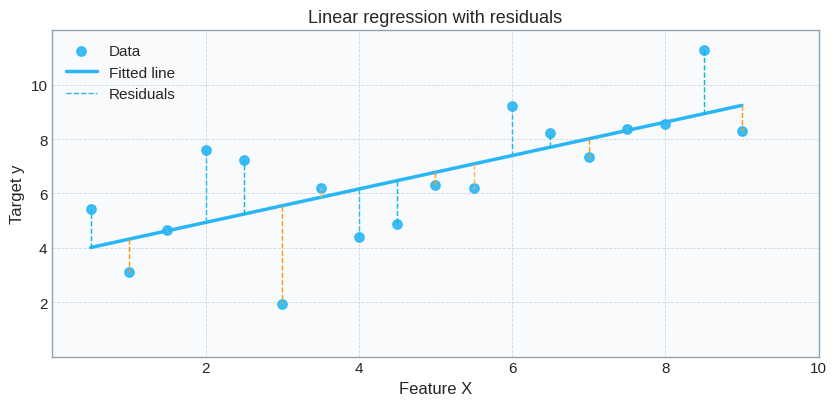

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

np.random.seed(0)
x = np.linspace(0.5, 9, 18)
y_true = 0.8 * x + 1.5
noise = np.random.normal(0, 2.0, size=x.shape)
y = y_true + noise

A = np.vstack([x, np.ones_like(x)]).T
w, b = np.linalg.lstsq(A, y, rcond=None)[0]
y_pred = w * x + b

plt.figure(figsize=(8.5, 4.2))

scatter = plt.scatter(
    x, y,
    s=45,
    alpha=0.9,
    label="Data"
)

line = plt.plot(
    x, y_pred,
    linewidth=2.5,
    linestyle="-",
    label="Fitted line"
)[0]

for xi, yi, ypi in zip(x, y, y_pred):
    plt.plot(
        [xi, xi], [ypi, yi],
        linestyle="--",
        linewidth=1.0
    )

residual_handle = mlines.Line2D(
    [], [],
    linestyle="--",
    linewidth=1.0,
    label="Residuals"
)

plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.xlim(0, 10)
plt.ylim(0, 12)
plt.title("Linear regression with residuals")

ax = plt.gca()
ax.set_xticks([2, 4, 6, 8, 10])
ax.set_yticks([2, 4, 6, 8, 10])

plt.legend(
    handles=[scatter, line, residual_handle],
    loc="upper left"
)

plt.tight_layout()
plt.savefig("img/linear_regression.png", dpi=300, bbox_inches="tight")
plt.show()

#### Multiple Linear Regression

So far, the linear regression model has been introduced with one generic target variable and several predictors, but the structure is the same whether we have a single feature or many. Multiple linear regression explicitly considers the case where the target depends on several input variables simultaneously.

Mathematically, the multiple linear regression model with $p - 1$ predictors can be written as:

$$
y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_{p-1} x_{i,\,p-1} + \epsilon_i, \quad i = 1, \dots, m
$$

Here, $\beta_0$ is the intercept, $\beta_j$ for $j = 1, \dots, p-1$ are the slope coefficients associated with each predictor $x_{ij}$, and $\epsilon_i$ are the error terms. As before, $\epsilon_i$ represent the unobservable random noise, while the residuals $e_i = y_i - \hat{y}_i$ are their empirical estimates obtained after fitting the model.

In matrix form, the model can be written compactly as:

$$
\mathbf{y} = X \boldsymbol{\beta} + \boldsymbol{\epsilon}
$$

where $\mathbf{y} \in \mathbb{R}^m$ is the vector of responses, $X \in \mathbb{R}^{m \times p}$ is the design matrix (each row corresponds to an observation and each column to a predictor, with the first column typically equal to 1 for the intercept), $\boldsymbol{\beta} \in \mathbb{R}^p$ is the vector of coefficients, and $\boldsymbol{\epsilon} \in \mathbb{R}^m$ is the vector of errors.

Ordinary Least Squares (OLS) estimation in the multiple linear regression setting is obtained by minimizing the sum of squared residuals:

$$
\min_{\boldsymbol{\beta}} \; \sum_{i=1}^{m} (y_i - \hat{y}_i)^2
\quad\text{with}\quad
\hat{y}_i = \beta_0 + \sum_{j=1}^{p-1} \beta_j x_{ij}.
$$

In matrix notation, the OLS estimator $\hat{\boldsymbol{\beta}}$ has the closed-form solution:

$$
\hat{\boldsymbol{\beta}} = (X^\top X)^{-1} X^\top \mathbf{y},
$$

provided that $X^\top X$ is invertible. This formula shows that multiple linear regression is still a linear model in the parameters: even if we add more predictors, or transformations of the original predictors, the estimation procedure remains the same.

The interpretation of the coefficients in multiple linear regression is **conditional** on the other variables being held fixed. The coefficient $\beta_j$ measures the expected change in the target variable $y$ for a one-unit increase in the predictor $x_j$, assuming all other predictors remain constant. This is a key difference from simple linear regression, where there is only one predictor and no need to condition on other variables.

Multiple linear regression is also the natural framework to introduce issues such as multicollinearity, interaction terms, and polynomial features. For example, a polynomial regression in one variable $x$,

$$
y_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \dots + \beta_k x_i^k + \epsilon_i,
$$

can be seen as a multiple linear regression where the predictors are the transformed features $x_i, x_i^2, \dots, x_i^k$. This perspective emphasizes that, although the relationship between $x$ and $y$ may be non-linear, the model remains linear in the parameters $\beta_j$ and can still be estimated using the same OLS machinery.

---

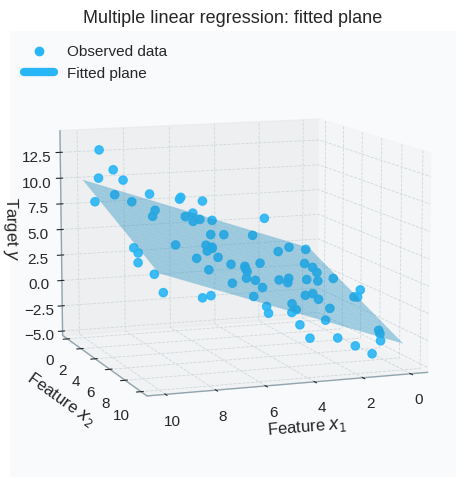

In [3]:
np.random.seed(0)
n = 80
x1 = np.random.uniform(0, 10, n)
x2 = np.random.uniform(0, 10, n)

beta0, beta1, beta2 = 2.0, 0.8, -0.5
noise = np.random.normal(0, 2.0, size=n)
y = beta0 + beta1 * x1 + beta2 * x2 + noise

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection="3d")

scatter = ax.scatter(
    x1, x2, y,
    s=35,
    alpha=0.9,
    label="Observed data"
)

grid_x1, grid_x2 = np.meshgrid(
    np.linspace(0, 10, 20),
    np.linspace(0, 10, 20)
)
grid_y = beta0 + beta1 * grid_x1 + beta2 * grid_x2

plane = ax.plot_surface(
    grid_x1, grid_x2, grid_y,
    alpha=0.4,
    linewidth=0,
    antialiased=True,
)

ax.set_xlabel("Feature $x_1$")
ax.set_ylabel("Feature $x_2$")
ax.set_zlabel("Target $y$")
ax.set_title("Multiple linear regression: fitted plane")
ax.view_init(elev=10, azim=70)

orange_handle = mlines.Line2D([], [], marker="o",
                              linestyle="None", label="Observed data")
plane_handle = mlines.Line2D([], [],
                             linestyle="-", linewidth=6, label="Fitted plane")

ax.legend(
    handles=[orange_handle, plane_handle],
    loc="upper left"
)

plt.tight_layout()
plt.savefig("img/multiple_linear_regression.png", dpi=300, bbox_inches="tight")
plt.show()


#### Implementation in R

In practice, linear regression models are often fitted using the R function `lm()`, which implements Ordinary Least Squares (OLS) estimation for a wide range of model specifications. A multiple linear regression can be defined as:

```
model <- lm(y ~ x1 + x2 + x3, data = df)
```

Here, `y` is the target variable, `x1`, `x2`, and `x3` are the predictors, and `df` is a data frame containing the data. The formula `y ~ x1 + x2 + x3` specifies that `y` is modeled as a linear combination of the predictors plus an intercept term, and `lm()` internally estimates the coefficients by minimizing the sum of squared residuals, exactly as described in the OLS formulation.

Before fitting the model, it is common practice to inspect the data and, when appropriate, split it into training and test sets or use cross-validation to obtain an unbiased estimate of the model’s generalization performance. In many real-world applications, predictors are also standardized (e.g., using `scale()`) to make coefficients comparable in magnitude and to prepare the data for regularized regression methods.

Once the model is fitted, the `summary()` function provides a detailed overview of the results:

```
summary(model)
```

This output includes the estimated coefficients, their standard errors, t-statistics, and p-values, which are used to assess the statistical significance of each predictor under the usual linear regression assumptions. For each coefficient $\hat{\beta}_j$, the standard error $\text{SE}(\hat{\beta}_j)$ measures the estimated variability of $\hat{\beta}_j$ across hypothetical repeated samples. The **t-statistic** is defined as

$$
t_j = \frac{\hat{\beta}_j}{\text{SE}(\hat{\beta}_j)},
$$

and, under the null hypothesis $H_0 : \beta_j = 0$ and assuming the linear model assumptions hold, $t_j$ approximately follows a t-distribution with $m - p$ degrees of freedom (where $m$ is the number of observations and $p$ the number of parameters, including the intercept). The corresponding **p-value** is the probability, under $H_0$, of observing a $t$-value as extreme or more extreme than the one computed from the data. A small p-value (typically below a chosen significance level, such as $0.05$) provides evidence against $H_0$, suggesting that the predictor $x_j$ is significantly associated with the response after controlling for the other variables in the model.

The `summary()` output also reports the Residual Standard Error, the **R-squared** and **Adjusted R-squared**, and an overall F-statistic that tests whether the model explains a significant amount of variance compared to a null model with no predictors.

The **Adjusted R-squared** is particularly important when comparing models with different numbers of predictors. Unlike the regular R-squared, which never decreases when new variables are added, the Adjusted R-squared penalizes unnecessary complexity and increases only if a new predictor improves the model more than would be expected by chance. In addition to R-squared, model selection in linear regression often relies on information criteria such as the **Akaike Information Criterion (AIC)** and the **Bayesian Information Criterion (BIC)**, which balance goodness of fit and model complexity: for both AIC and BIC, **lower values indicate a better trade-off** between fit and parsimony.

---

#### Matrix Form

Linear regression is most naturally expressed in matrix notation. This allows us to write the model for all observations and all predictors in a single compact equation.

Let:
- $\mathbf{y} \in \mathbb{R}^{m \times 1}$ be the vector of target values (one entry per observation),
- $X \in \mathbb{R}^{m \times p}$ be the design matrix, where:
  - the first column is a column of ones (for the intercept),
  - the remaining $p - 1$ columns contain the predictor values,
- $\boldsymbol{\beta} \in \mathbb{R}^{p \times 1}$ be the vector of parameters (intercept and coefficients),
- $\boldsymbol{\epsilon} \in \mathbb{R}^{m \times 1}$ be the vector of error terms.

The multiple linear regression model can then be written compactly as:

$$
\mathbf{y} = X \boldsymbol{\beta} + \boldsymbol{\epsilon}
$$

For a given parameter vector $\boldsymbol{\beta}$, the predictions for all $m$ observations are:

$$
\hat{\mathbf{y}} = X \hat{\boldsymbol{\beta}}
$$

The Ordinary Least Squares (OLS) estimator $\hat{\boldsymbol{\beta}}$ is obtained by minimizing the sum of squared residuals $\|\mathbf{y} - X\boldsymbol{\beta}\|^2$. Under standard conditions (e.g., $X^\top X$ invertible), the closed-form solution is:

$$
\hat{\boldsymbol{\beta}} = (X^\top X)^{-1} X^\top \mathbf{y}
$$

This shows that, regardless of how many predictors we include, the estimation procedure remains the same: only the design matrix $X$ changes when we add, remove, or transform features.

#### Example (Two Predictors)

Consider a small example with two predictors $x_1$ and $x_2$ and three observations. We model:

$$
\hat{y}_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2}
$$

with data:

| i | $x_{i1}$ | $x_{i2}$ | $y_i$ |
|---|---------|---------|------|
| 1 | 1       | 0       | 2    |
| 2 | 2       | 1       | 4    |
| 3 | 3       | 2       | 7    |

In matrix form, we define:

- Target vector:
  $$
  \mathbf{y} =
  \begin{bmatrix}
  2 \\
  4 \\
  7
  \end{bmatrix}
  $$

- Design matrix (first column of ones for the intercept, then $x_1$ and $x_2$):
  $$
  X =
  \begin{bmatrix}
  1 & 1 & 0 \\
  1 & 2 & 1 \\
  1 & 3 & 2
  \end{bmatrix}
  $$

- Parameter vector:
  $$
  \boldsymbol{\beta} =
  \begin{bmatrix}
  \beta_0 \\
  \beta_1 \\
  \beta_2
  \end{bmatrix}
  $$
  
The model is:

$$
\mathbf{y} = X \boldsymbol{\beta} + \boldsymbol{\epsilon}
$$

Using OLS in matrix form, the estimated coefficients are:

$$
\hat{\boldsymbol{\beta}} = (X^\top X)^{-1} X^\top \mathbf{y}
$$

For this example:

$$
X^\top X =
\begin{bmatrix}
3 & 6 & 3 \\
6 & 14 & 8 \\
3 & 8 & 5
\end{bmatrix},
\qquad
X^\top \mathbf{y} =
\begin{bmatrix}
13 \\
31 \\
18
\end{bmatrix}
$$

and $(X^\top X)^{-1}$ exists (details of the inversion can be omitted in practice, since it is handled numerically by libraries). By multiplying $(X^\top X)^{-1}$ and $X^\top \mathbf{y}$ we obtain:

$$
\hat{\boldsymbol{\beta}} =
\begin{bmatrix}
1 \\
1 \\
1
\end{bmatrix}
$$

so the fitted model is:

$$
\hat{y} = 1 + 1 \cdot x_1 + 1 \cdot x_2.
$$

This example shows how the compact matrix formula $(X^\top X)^{-1} X^\top \mathbf{y}$ directly produces the intercept and coefficients for a multiple linear regression model with more than one predictor.

---

#### Categorical Variables

In many real-world regression problems, not all predictors are numerical. We often have **categorical variables**, such as `city`, `education_level`, or `product_type`. Linear regression, however, operates on numerical inputs, so categorical variables must be encoded into numeric form before they can be included in the model.

A common strategy is **one-hot encoding** (or dummy encoding). Suppose we have a categorical variable `color` with three possible values: `red`, `green`, `blue`. We create three binary indicators:

- $x_{\text{red}} = 1$ if `color = red`, otherwise $0$  
- $x_{\text{green}} = 1$ if `color = green`, otherwise $0$  
- $x_{\text{blue}} = 1$ if `color = blue`, otherwise $0$

If we include all three dummies together with an intercept, we introduce perfect multicollinearity, because:

$$
x_{\text{red}} + x_{\text{green}} + x_{\text{blue}} = 1 \quad \text{for every observation.}
$$

To avoid this, one category is taken as a **reference level** and its dummy is omitted (e.g., drop `blue`). The model becomes:

$$
\hat{y}_i = \beta_0
          + \beta_{\text{red}} x_{i,\text{red}}
          + \beta_{\text{green}} x_{i,\text{green}}
          + \text{(other numeric predictors)}.
$$

In this parameterization:

- $\beta_0$ is the expected value of $y$ for the reference category (`blue`) when all other predictors are zero.  
- $\beta_{\text{red}}$ is the expected difference in $y$ between `red` and `blue`, holding other predictors fixed.  
- $\beta_{\text{green}}$ is the expected difference in $y$ between `green` and `blue`, holding other predictors fixed.

From the matrix point of view, each dummy variable is just another column of the design matrix $X$. The only difference is that these columns contain 0/1 values instead of continuous numbers. As long as we avoid including all dummy columns for a categorical variable (i.e., we drop one category), the usual OLS machinery and the closed-form solution still apply without modification.

#### Example: Model Formula with Dummy Variables

Suppose we have one numerical predictor `size` and one categorical predictor `color` with three levels: `red`, `green`, `blue`. After dummy encoding (and dropping `blue` as reference), our predictors are:

- $x_{\text{size}}$ (numeric)
- $x_{\text{red}}$ (dummy: 1 if `color = red`, 0 otherwise)
- $x_{\text{green}}$ (dummy: 1 if `color = green`, 0 otherwise)

The regression model can be written as:

$$
\hat{y}_i
= \beta_0
+ \beta_{\text{size}} \, x_{i,\text{size}}
+ \beta_{\text{red}} \, x_{i,\text{red}}
+ \beta_{\text{green}} \, x_{i,\text{green}}.
$$

If we look at each color separately:

- For `blue` (reference): $x_{i,\text{red}} = 0$, $x_{i,\text{green}} = 0$  
  $$
  \hat{y}_i \mid \text{blue}
  = \beta_0 + \beta_{\text{size}} \, x_{i,\text{size}}.
  $$

- For `red`: $x_{i,\text{red}} = 1$, $x_{i,\text{green}} = 0$  
  $$
  \hat{y}_i \mid \text{red}
  = (\beta_0 + \beta_{\text{red}})
  + \beta_{\text{size}} \, x_{i,\text{size}}.
  $$

- For `green`: $x_{i,\text{red}} = 0$, $x_{i,\text{green}} = 1$  
  $$
  \hat{y}_i \mid \text{green}
  = (\beta_0 + \beta_{\text{green}})
  + \beta_{\text{size}} \, x_{i,\text{size}}.
  $$

This makes the interpretation clear:

- $\beta_0$ is the intercept for the reference category `blue`.  
- $\beta_{\text{red}}$ and $\beta_{\text{green}}$ shift the intercept up or down for `red` and `green` relative to `blue`, while the slope with respect to `size` remains $\beta_{\text{size}}$ for all colors.

---

#### Interaction Terms

So far, the regression models have assumed that each predictor has an effect on the target that does not depend on the values of the other predictors. In many real-world problems, however, the effect of one variable can **change** depending on another variable. Interaction terms allow the model to capture these context-dependent effects.

In a multiple linear regression without interactions, a model like

$$
\hat{y}_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2}
$$

assumes that:
- the effect of $x_1$ on $y$ is always $\beta_1$, regardless of the value of $x_2$  
- the effect of $x_2$ on $y$ is always $\beta_2$, regardless of the value of $x_1$.

To allow the effect of $x_1$ to depend on $x_2$, we add an **interaction term** $x_{i1} x_{i2}$:

$$
\hat{y}_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \gamma\, x_{i1} x_{i2}.
$$

Now the partial effect of $x_1$ on $\hat{y}$ is

$$
\frac{\partial \hat{y}_i}{\partial x_{i1}} = \beta_1 + \gamma x_{i2},
$$

so it changes with $x_{i2}$. Similarly, the effect of $x_2$ depends on $x_1$.

From a design-matrix perspective, the interaction term is simply a **new column** in $X$, whose entries are the products $x_{i1} x_{i2}$.

#### Example: Numeric × Categorical

Consider the earlier example with one numerical predictor `size` and one categorical predictor `color` with levels `red`, `green`, `blue` (with `blue` as reference). After dummy encoding, we have:

- $x_{\text{size}}$ (numeric)
- $x_{\text{red}}$ (dummy)
- $x_{\text{green}}$ (dummy)

A model **without** interactions is:

$$
\hat{y}_i
= \beta_0
+ \beta_{\text{size}} \, x_{i,\text{size}}
+ \beta_{\text{red}} \, x_{i,\text{red}}
+ \beta_{\text{green}} \, x_{i,\text{green}}.
$$

In this model, the slope with respect to `size` is $\beta_{\text{size}}$ for all colors; the dummies shift only the intercept.

To allow the slope of `size` to depend on `color`, we include interaction terms between `size` and the dummies:

$$
\hat{y}_i =
\beta_0
+ \beta_{\text{size}} \, x_{i,\text{size}}
+ \beta_{\text{red}} \, x_{i,\text{red}}
+ \beta_{\text{green}} \, x_{i,\text{green}}
+ \gamma_{\text{red}} \, (x_{i,\text{size}} \cdot x_{i,\text{red}})
+ \gamma_{\text{green}} \, (x_{i,\text{size}} \cdot x_{i,\text{green}}).
$$

Now the model implies different lines for each color:

- `blue` (reference): $x_{i,\text{red}} = x_{i,\text{green}} = 0$
  $$
  \hat{y}_i \mid \text{blue}
  = \beta_0 + \beta_{\text{size}} \, x_{i,\text{size}}.
  $$

- `red`: $x_{i,\text{red}} = 1$, $x_{i,\text{green}} = 0$
  $$
  \hat{y}_i \mid \text{red}
  = (\beta_0 + \beta_{\text{red}})
  + (\beta_{\text{size}} + \gamma_{\text{red}})\, x_{i,\text{size}}.
  $$

- `green`: $x_{i,\text{red}} = 0$, $x_{i,\text{green}} = 1$
  $$
  \hat{y}_i \mid \text{green}
  = (\beta_0 + \beta_{\text{green}})
  + (\beta_{\text{size}} + \gamma_{\text{green}})\, x_{i,\text{size}}.
  $$

In this parameterization:
- the intercept changes across colors (through $\beta_{\text{red}}$ and $\beta_{\text{green}}$),
- the slope with respect to `size` also changes across colors (through $\gamma_{\text{red}}$ and $\gamma_{\text{green}}$).

Interaction terms are useful when:

- domain knowledge suggests that the effect of one variable should depend on another (e.g., effect of a treatment depending on age, effect of price depending on segment),  
- plots or exploratory analysis show that the relationship between a numeric predictor and $y$ differs across groups.

In practice, interactions are implemented by adding product columns to the design matrix $X$. The model remains linear in the parameters and can still be estimated with the usual OLS machinery.

---

#### ANOVA

In the context of multiple linear regression, Analysis of Variance (ANOVA) decomposes the total variability of the response variable into a component explained jointly by all predictors in the model and a residual (unexplained) component. The starting point is the decomposition of the total sum of squares:

$$
\text{TSS} = \sum_{i=1}^{m} (y_i - \bar{y})^2
= \underbrace{\sum_{i=1}^{m} (\hat{y}_i - \bar{y})^2}_{\text{Model sum of squares (MSS)}}
+ \underbrace{\sum_{i=1}^{m} (y_i - \hat{y}_i)^2}_{\text{Residual sum of squares (RSS)}}
$$

Here, $\text{TSS}$ (Total Sum of Squares) measures the overall variability of $y$ around its mean, $\text{MSS}$ measures the variability explained by the multiple regression model (i.e., by all predictors taken together), and $\text{RSS}$ measures the variability that remains in the residuals. Note that the coefficient of determination can be written as $R^2 = \text{MSS} / \text{TSS}$.

In a multiple linear regression with $p$ parameters (including the intercept), the degrees of freedom associated with each sum of squares are:

- Model degrees of freedom: $\text{df}_{\text{model}} = p - 1$ (number of slope coefficients/predictors)
- Residual degrees of freedom: $\text{df}_{\text{res}} = m - p$
- Total degrees of freedom: $\text{df}_{\text{tot}} = m - 1$

From these, the mean squares are defined as:

$$
\text{MS}_{\text{model}} = \frac{\text{MSS}}{\text{df}_{\text{model}}}, \quad
\text{MS}_{\text{res}}   = \frac{\text{RSS}}{\text{df}_{\text{res}}}
$$

The overall F-test for the multiple regression model compares the full model (with all predictors) against a null model with only the intercept. The null and alternative hypotheses are:

- $H_0$: all slope coefficients are zero (the predictors, taken together, do not explain more variability than the mean), i.e. $\beta_1 = \beta_2 = \dots = \beta_{p-1} = 0$
- $H_1$: at least one slope coefficient is non-zero (the predictors, taken together, explain a non-negligible part of the variability)

The F-statistic is defined as:

$$
F = \frac{\text{MS}_{\text{model}}}{\text{MS}_{\text{res}}}
$$

Under $H_0$, this statistic approximately follows an F-distribution with $(\text{df}_{\text{model}}, \text{df}_{\text{res}})$ degrees of freedom. A large value of $F$ (with a small p-value) provides evidence against $H_0$, indicating that the multiple regression model explains a significant portion of the variability in the response compared to using only the mean.

In R, the ANOVA table for a single multiple regression model is obtained via:

```
anova(model)
```

which reports, for each source of variation, the sum of squares (SS), degrees of freedom (Df), mean squares (MS), F-statistics, and p-values.

ANOVA can also be used to compare **nested multiple regression models**, for example, a reduced model containing only a subset of predictors and a more complex full model with additional predictors:

```
model_reduced <- lm(y ~ x1 + x2, data = df)
model_full    <- lm(y ~ x1 + x2 + x3, data = df)

anova(model_reduced, model_full)
```

In this case, the hypotheses are:

- $H_0$: the reduced model is sufficient (the additional predictor(s) in `model_full` do not improve the fit)
- $H_1$: the full model provides a better fit (at least one of the additional predictors contributes significantly)

The F-statistic is constructed from the reduction in RSS and the loss of degrees of freedom when moving from the reduced to the full model. A significant p-value indicates that the additional predictors in the full multiple regression model lead to a statistically significant improvement in explained variance.

---

#### AIC and BIC

While ANOVA focuses on hypothesis testing for nested models, information criteria such as the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC) provide a way to compare multiple models (not necessarily nested) by balancing goodness of fit and model complexity.

For a fitted model with maximized log-likelihood $\ell$ and $k$ free parameters, the AIC is defined as:

$$
\text{AIC} = 2k - 2\ell
$$

and the BIC is defined as:

$$
\text{BIC} = k \log(m) - 2\ell
$$

where $m$ is the number of observations. Both criteria penalize models with more parameters:

- The term $2k$ in AIC and $k \log(m)$ in BIC act as penalties for model complexity.
- The term $-2\ell$ decreases as the model fits the data better (higher log-likelihood).

In linear regression with Gaussian errors, the log-likelihood $\ell$ is, up to an additive constant, a function of the residual sum of squares (RSS):

$$
\ell \propto -\frac{m}{2} \log\left(\frac{\text{RSS}}{m}\right)
$$

so models with smaller RSS (better fit) tend to have larger $\ell$ and therefore smaller AIC and BIC, all else being equal.

The general rule for model comparison is:

- Prefer the model with **lower AIC**.
- Prefer the model with **lower BIC**.

Because BIC uses $\log(m)$ instead of 2 as penalty weight, it penalizes complexity more strongly than AIC, especially for large sample sizes. As a result:

- AIC tends to favor models with better predictive performance, possibly with slightly more parameters.
- BIC tends to favor more parsimonious models and is often used in a more “conservative” model selection perspective.

In R, AIC and BIC can be computed directly:

```
AIC(model_reduced, model_full)
BIC(model_reduced, model_full)
```

These functions return the AIC/BIC values for each model, allowing direct comparison. When combined with ANOVA and adjusted R-squared, AIC and BIC provide a comprehensive toolkit to decide which linear regression specification is most appropriate in terms of both explanatory power and complexity.


#### Residuals vs Fitted plot

A key diagnostic tool for linear regression is the residuals vs fitted plot, which visualizes the relationship between the residuals $e_i = y_i - \hat{y}_i$ and the fitted values $\hat{y}_i$. Under the standard linear regression assumptions, the residuals should be centered around zero and display no systematic pattern as a function of the fitted values.

If the model is appropriate and the assumptions of linearity and homoscedasticity hold, the residuals vs fitted plot should show a random cloud of points with roughly constant vertical spread along the horizontal axis. In contrast, visible structures (for example, a curved pattern or a “funnel” shape with increasing spread) suggest model misspecification: curvature indicates that the linearity assumption may be violated, while a funnel-shaped pattern indicates heteroscedasticity (non-constant variance of the errors).

In R, the residuals vs fitted plot can be obtained directly from a fitted `lm` object:

```
plot(model, which = 1)
```

Here, `which = 1` selects the first standard diagnostic plot, where the x-axis shows the fitted values $\hat{y}_i$ and the y-axis shows the standardized residuals. This visualization is particularly useful to decide whether transformations of the response or predictors, or a more flexible model (e.g. adding polynomial terms or interactions), might be necessary to better capture the underlying relationship.


#### Q-Q plot of residuals

Another important assumption of the classical linear regression model is that the errors (and therefore the residuals, as their estimates) are approximately normally distributed. This assumption is crucial for the validity of t-tests, F-tests, and confidence intervals for the regression coefficients. A Q-Q (quantile–quantile) plot provides a visual check of the normality of the residuals.

The idea of the Q-Q plot is to compare the empirical quantiles of the residuals with the theoretical quantiles of a standard normal distribution. If the residuals follow a normal distribution, the points in the Q-Q plot should lie approximately on a straight line. Systematic deviations from the line indicate departures from normality: heavy tails (points bending away at the ends), skewness (points systematically above or below the line on one side), or other irregular patterns.

In R, the Q-Q plot for the residuals of a linear model can be produced with:

```
plot(model, which = 2)
```

This generates a normal Q-Q plot of the standardized residuals. Mild deviations from the line are often acceptable in practice, especially for large samples where the central limit theorem mitigates moderate non-normality. However, strong deviations may suggest the presence of outliers, skewness, or other distributional issues that can affect inference, and might motivate transformations of the response or the use of more robust modeling approaches.

---

#### Bias–Variance Tradeoff

When building regression models, there is a fundamental tradeoff between bias and variance that determines how well the model will generalize to unseen data. Intuitively, increasing model complexity (for example, by adding more predictors or using higher-degree polynomials) tends to reduce bias but increase variance, while simplifying the model has the opposite effect.

In the standard regression setting, the expected prediction error at a point $x$ can be decomposed as:

$$
\mathbb{E}\big[(Y - \hat{f}(x))^2\big]
= \underbrace{\big(\mathbb{E}[\hat{f}(x)] - f(x)\big)^2}_{\text{Bias}^2}
+ \underbrace{\mathbb{V}[\hat{f}(x)]}_{\text{Variance}}
+ \underbrace{\sigma^2}_{\text{Irreducible error}}
$$

Here, $f(x)$ is the true regression function, $\hat{f}(x)$ is the model’s prediction, and $\sigma^2$ is the variance of the noise in the data. The **bias** term measures how far, on average, the model’s predictions are from the true function (systematic error), while the **variance** term measures how sensitive the model is to fluctuations in the training data (how much the predictions change if we fit the model on different samples).

Simple models, such as a linear regression with very few predictors or low-degree polynomials, typically have **high bias and low variance**: they may underfit the data and fail to capture important structure, but their predictions are relatively stable across different training sets. In contrast, very flexible models, such as high-degree polynomial regressions or models with many interaction terms, tend to have **low bias and high variance**: they can closely follow the training data, including noise, but their predictions may change drastically if the training data change slightly, leading to overfitting. 

The bias–variance tradeoff implies that there is an intermediate level of model complexity that minimizes the overall expected prediction error. In practice, techniques such as **cross-validation** are used to select model complexity (for example, the degree of a polynomial or the amount of regularization) that achieves a good balance between bias and variance. Regularization methods like Ridge, Lasso, and Elastic Net explicitly control model flexibility by shrinking coefficients towards zero, thereby reducing variance at the cost of introducing some additional bias.

---

### Polynomial Regression

Polynomial regression is an extension of linear regression that allows the model to capture non‑linear relationships between the input features and the target variable by introducing polynomial terms of the original features. Although the relationship between the original feature $x$ and the target $y$ can be curved, the model remains **linear in the parameters** because it is a linear combination of transformed features.


In the simplest case with a single predictor $x$, a polynomial regression of degree $k$ can be written as:

$$
y_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \dots + \beta_k x_i^k + \epsilon_i,
\quad i = 1, \dots, m
$$

If we define new features $z_{i1} = x_i, \; z_{i2} = x_i^2, \dots, z_{ik} = x_i^k$, this model is just a multiple linear regression in the transformed feature vector $(z_{i1}, \dots, z_{ik})$.

Let $Z$ be the design matrix whose columns are $\mathbf{1}, x, x^2, \dots, x^k$. Then the model is:

$$
\mathbf{y} = Z \boldsymbol{\beta} + \boldsymbol{\epsilon}
$$

and the coefficients can still be estimated by Ordinary Least Squares using:

$$
\hat{\boldsymbol{\beta}} = (Z^\top Z)^{-1} Z^\top \mathbf{y},
$$

provided that $Z^\top Z$ is invertible. This shows that polynomial regression does not change the estimation machinery; it only changes the feature space in which linear regression is applied.

### Implementing polynomial regression in R

There are two common ways to specify polynomial terms in R:

1. **Using explicit powers with `I()`** (raw polynomial):

```r
# quadratic
fit_quad <- lm(y ~ x + I(x^2), data = df)

# cubic
fit_cubic <- lm(y ~ x + I(x^2) + I(x^3), data = df)
```

The `I()` function tells R to interpret `x^2` as “x squared” and not as part of the formula language.

2. **Using `poly()`**:

```r
# degree 3, orthogonal polynomials (default)
fit_poly3 <- lm(y ~ poly(x, 3), data = df)

# degree 3, raw powers
fit_poly3_raw <- lm(y ~ poly(x, 3, raw = TRUE), data = df)
```

- `poly(x, 3, raw = TRUE)` generates the columns $x, x^2, x^3$ (like manual `I(x^2)`, etc.).
- `poly(x, 3)` (default `raw = FALSE`) generates **orthogonal polynomials**, which are linear combinations of $x, x^2, x^3$ but decorrelated; this improves numerical stability. The fitted values are the same up to numerical precision, only the coefficients differ in interpretation.

---

#### Box–Cox Transformation

The Box–Cox transformation is a parametric family of power transformations for strictly positive responses $y > 0$, defined as:

$$
y^{(\lambda)} =
\begin{cases}
\dfrac{y^\lambda - 1}{\lambda}, & \lambda \neq 0 \\
\log(y), & \lambda = 0
\end{cases}
$$

The parameter $\lambda$ controls the shape of the transformation: $\lambda = 1$ corresponds to no transformation, $\lambda = 0$ to a log transform, values like $\lambda \approx 0.5$ approximate a square‑root transform, and $\lambda = -1$ is close to a reciprocal transform. The main goals are to reduce skewness and heteroscedasticity and to make the relationship between predictors and response closer to linear.

In the context of linear regression, the Box–Cox transformation is typically applied to the **response** $y$ rather than the predictors. One considers a model of the form
$$
y_i^{(\lambda)} = \beta_0 + \beta_1 x_{i1} + \dots + \beta_p x_{ip} + \epsilon_i,
$$
where $y_i^{(\lambda)}$ is the transformed response. The parameter $\lambda$ is chosen (for example) by maximizing the profile log‑likelihood under the assumption of normal, constant‑variance errors for $y^{(\lambda)}$. After selecting $\lambda$, the linear model is fitted on the transformed scale using ordinary least squares, and standard diagnostic tools (residual plots, Q–Q plots) are used to assess whether normality and homoscedasticity have improved.

---

### Genralized Linear Model (GLM)

Generalized Linear Models extend ordinary linear regression to handle non‑Gaussian responses (binary, counts, positive data, proportions) while preserving a linear predictor and a likelihood‑based estimation framework.

A standard linear model assumes a continuous response with normal errors and a linear relation between predictors and the response mean:
$$
Y_i = \beta_0 + \beta_1 x_{i1} + \dots + \beta_p x_{ip} + \epsilon_i,
\quad \epsilon_i \sim \text{Normal}(0,\sigma^2).
$$
This is often unrealistic for binary outcomes, counts, or skewed positive data. GLMs generalize this by:

- allowing $Y_i$ to follow a distribution from the **exponential family** (e.g. normal, binomial, Poisson, gamma)  
- keeping a **linear predictor** $\eta_i = \beta_0 + \beta_1 x_{i1} + \dots + \beta_p x_{ip}$  
- linking the **mean** $\mu_i = \mathbb{E}[Y_i\mid X_i]$ to $\eta_i$ through a **link function** $g$:
  $$
  g(\mu_i) = \eta_i.
  $$

The classical linear regression model is a special case: normal errors + identity link $g(\mu) = \mu$.

---

Every GLM is defined by three building blocks:

1. **Random component (distribution of $Y$)**  
   The conditional distribution of $Y_i$ given predictors belongs to the exponential family:
   - normal for continuous symmetric data  
   - binomial/Bernoulli for binary or proportion data  
   - Poisson for counts  
   - gamma for positive, continuous, right‑skewed responses.  
   The model specifies $Y_i \mid X_i \sim \text{Dist}(\mu_i, \phi)$ where $\mu_i$ is the mean and $\phi$ is a dispersion (or scale) parameter.

2. **Systematic component (linear predictor)**  
   Predictors enter through a linear combination:
   $$
   \eta_i = \beta_0 + \beta_1 x_{i1} + \dots + \beta_p x_{ip}.
   $$
   Here $x_{ij}$ can be:
   - raw numeric features  
   - dummy variables for categoricals  
   - interactions, polynomial terms, etc.  
   This is the same structure as in multiple linear regression; only the meaning of $\eta_i$ changes via the link.

3. **Link function**  
   The link $g$ connects the mean $\mu_i$ to the linear predictor:
   $$
   g(\mu_i) = \eta_i \quad \Longleftrightarrow \quad \mu_i = g^{-1}(\eta_i).
   $$
   It is chosen so that:
   - the transformed mean $g(\mu_i)$ can range over all real numbers (matching $\eta_i \in \mathbb{R}$)  
   - the inverse link $g^{-1}(\cdot)$ maps back into the natural domain of the mean (e.g. $(0,1)$ for probabilities, $(0,\infty)$ for intensities).  

Typical “canonical” links:

- **Normal**: identity link $g(\mu) = \mu$ (ordinary linear regression).  
- **Binomial**: logit link $g(\mu) = \log\big(\mu/(1-\mu)\big)$, giving logistic regression for binary outcomes.  
- **Poisson**: log link $g(\mu) = \log(\mu)$, giving a log‑linear model for counts.  
- **Gamma**: inverse or log link, for positive skewed responses.

---

GLMs allow you to:

- model responses with **non‑Gaussian distributions** while keeping a linear predictor  
- respect the **natural range** of the response (probabilities in $(0,1)$, counts $\in \{0,1,2,\dots\}$, positive data $>0$)  
- maintain a unified framework for:
  - parameter estimation via **maximum likelihood**  
  - model comparison via **deviance** and **information criteria** (AIC, BIC)  
  - inference using asymptotic normality of estimators (standard errors, Wald tests, likelihood ratio tests).

---

Generalized linear models in R are fitted with the same formula syntax as `lm()`, using `glm()` and specifying the appropriate family (distribution + link).  
A generic GLM in R looks like:

```r
model_glm <- glm(y ~ x1 + x2 + x1:x2, 
                 family = binomial(link = "logit"), 
                 data = df)
```

- `y ~ x1 + x2 + x1:x2` encodes the linear predictor $\eta_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \beta_3 x_{i1}x_{i2}$.  
- `family = binomial(link = "logit")` chooses the binomial distribution and logit link; changing `family` (e.g. `poisson(link = "log")`, `Gamma(link = "log")`) changes the random component and link, while the formula part (the linear predictor) remains the same.
---


In GLMs, inference on coefficients is still based on standard errors and Wald‑type statistics, but, instead of a $t$‑value, software typically reports a **$z$‑value**:
$$
z_j = \frac{\hat\beta_j}{\text{SE}(\hat\beta_j)},
$$
which is interpreted using the standard normal distribution (asymptotic approximation) to obtain $p$‑values, rather than a $t$‑distribution as in ordinary least squares.

---

#### Deviance in GLMs

In generalized linear models, the **deviance** is a generalization of the residual sum of squares used in linear regression. It measures how far a fitted model is from the “saturated” model (a model that fits each observation perfectly) in terms of log‑likelihood.

For a GLM, the deviance of a fitted model is defined as:
$$
D = 2 \left[ \ell(\text{saturated model}) - \ell(\text{fitted model}) \right],
$$
where $\ell(\cdot)$ denotes the maximized log‑likelihood of the model. Smaller deviance means the fitted model is closer (in likelihood terms) to the saturated model, i.e., it explains the data better.

For normal linear regression with identity link and constant variance, the deviance is (up to a constant factor) just the **residual sum of squares**:
$$
D \propto \sum_{i=1}^m (y_i - \hat{y}_i)^2,
$$
so deviance reduces to the familiar notion of “sum of squared residuals”.

Deviance is especially useful for:

- **Goodness of fit**: the residual deviance of a single model (compared to its degrees of freedom) gives a rough idea of how well the model fits.  
- **Model comparison**: the difference in deviance between two nested models,
  $$
  \Delta D = D_{\text{reduced}} - D_{\text{full}},
  $$
  can be used as a test statistic (likelihood ratio test) to assess whether the additional parameters in the full model significantly improve the fit.

In practice, software reports:

- **Residual deviance**: deviance of the current fitted model.  
- **Null deviance**: deviance of a model with only the intercept.  

The reduction from null deviance to residual deviance is the part of variability explained by the predictors in the GLM, analogous to how the reduction in total sum of squares is interpreted in linear regression.

---

#### Normal GLM (Linear Regression as a GLM)

In the GLM framework, ordinary linear regression corresponds to choosing a normal response and the identity link. Specifically,

- Random component:
  $Y_i \mid X_i \sim \text{Normal}(\mu_i, \sigma^2)$
- Systematic component:
  $$
  \eta_i = \beta_0 + \beta_1 x_{i1} + \dots + \beta_p x_{ip}
  $$
- Link function:
  $$
  g(\mu_i) = \mu_i = \eta_i
  $$

so that $\mu_i = \mathbb{E}[Y_i \mid X_i] = \eta_i$.

This shows that the classical multiple linear regression model is a special case of a GLM with normal errors and identity link. All the extensions discussed earlier (dummy variables, interaction terms, polynomial features) can be seen as instances of the same GLM structure with a different design matrix $X$, while the distribution and link remain the same.

---

#### Binomial GLM

Binomial GLMs are used for modeling binary outcomes (0/1) or counts of “successes” out of a fixed number of trials, using an appropriate distribution and link function. Typical examples include modeling whether a customer churns (yes/no), whether a patient responds to a treatment (success/failure), or the proportion of defective items in a batch out of $n_i$ inspected units.

---

In the simplest binary case, each observation $Y_i$ takes values in $\{0,1\}$ and is modeled as a Bernoulli variable with success probability $\mu_i$:

$$
Y_i \sim \text{Bernoulli}(\mu_i), \quad \mathbb{P}(Y_i = 1 \mid X_i) = \mu_i.
$$

More generally, for grouped/binomial data, you can have $Y_i$ successes out of $n_i$ trials:

$$
Y_i \sim \text{Binomial}(n_i, \mu_i), \quad i = 1,\dots,m.
$$

Here $\mu_i$ is the success probability for observation $i$, and the expected value is $\mathbb{E}[Y_i \mid X_i] = n_i \mu_i$ or $\mathbb{E}[Y_i/n_i \mid X_i] = \mu_i$.

---

#### Link function: logistic regression

A binomial GLM specifies a link between the mean $\mu_i$ and a linear predictor $\eta_i = \beta_0 + \beta_1 x_{i1} + \dots + \beta_p x_{ip}$.

The **canonical** link for the binomial family is the **logit**:

$$
g(\mu_i) = \log\left(\frac{\mu_i}{1 - \mu_i}\right) = \eta_i.
$$

Equivalently,

$$
\mu_i = g^{-1}(\eta_i)
= \frac{\exp(\eta_i)}{1 + \exp(\eta_i)}
= \frac{1}{1 + \exp(-\eta_i)}.
$$

This is the standard **logistic regression** model. The key interpretive points:

- $\eta_i$ is the **log‑odds** of success:
  $$
  \eta_i = \log\left(\frac{\mu_i}{1 - \mu_i}\right).
  $$
- A one‑unit increase in $x_{ij}$ changes $\eta_i$ by $\beta_j$, so it multiplies the **odds** by $\exp(\beta_j)$:
  $$
  \text{odds}_i = \frac{\mu_i}{1 - \mu_i}, \quad
  \text{odds}_i^\text{(new)} = \exp(\beta_j) \cdot \text{odds}_i^\text{(old)}.
  $$

---

In binomial GLMs, the three components are:

- Random component:  
  $Y_i \mid X_i \sim \text{Binomial}(n_i, \mu_i)$ (or Bernoulli with $n_i = 1$).  
- Systematic component:  
  $$
  \eta_i = \beta_0 + \beta_1 x_{i1} + \dots + \beta_p x_{ip}.
  $$
- Link function (logit):  
  $$
  g(\mu_i) = \log\left(\frac{\mu_i}{1 - \mu_i}\right) = \eta_i.
  $$

Parameters $\beta$ are estimated by **maximum likelihood**. There is no closed‑form solution like in OLS; numerical algorithms (iteratively reweighted least squares, IRLS) are used internally, but conceptualmente rimane: trovi i $\beta$ che rendono i dati osservati più plausibili secondo il modello binomiale con link logit.

```r
# binary outcome: y = 1 if customer churns, 0 otherwise
# x1, x2 are predictors (e.g., tenure, monthly_charges)
fit_logit <- glm(
  y ~ x1 + x2,
  family = binomial(link = "logit"),
  data   = df
)

summary(fit_logit)
```

Here the formula specifies the linear predictor $\eta_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2}$, while family = binomial(link = "logit") chooses the binomial distribution and logit link; the fitted probabilities are $\hat\mu_i = \mathbb{P}(Y_i = 1 \mid X_i) = 1 / (1 + e^{-\hat\eta_i})$.

---

#### Poisson GLM

Poisson GLMs model **count data** (number of events) using a Poisson distribution and typically a log link. They are appropriate when the response is a non‑negative integer and represents event counts per unit time, area, or other exposure.

In a basic Poisson regression, each observation $Y_i$ is a count:

$$
Y_i \sim \text{Poisson}(\mu_i), \quad Y_i \in \{0,1,2,\dots\}
$$

with mean and variance both equal to $\mu_i$ (equidispersion). Typical examples include the number of calls per hour, number of incidents per day, or number of claims per policy.

---

A Poisson GLM links the mean $\mu_i$ to a linear predictor $\eta_i = \beta_0 + \beta_1 x_{i1} + \dots + \beta_p x_{ip}$ via the **log link**:

$$
g(\mu_i) = \log(\mu_i) = \eta_i.
$$

Equivalently,

$$
\mu_i = g^{-1}(\eta_i) = \exp(\eta_i).
$$

This guarantees $\mu_i > 0$ for any real $\eta_i$ and yields a **log‑linear model** for the expected count. A one‑unit increase in $x_{ij}$ changes $\eta_i$ by $\beta_j$, so it multiplies the expected count by $\exp(\beta_j)$:

- additively on the log scale: $\eta_i^\text{(new)} = \eta_i^\text{(old)} + \beta_j$  
- multiplicatively on the count scale: $\mu_i^\text{(new)} = \exp(\beta_j) \cdot \mu_i^\text{(old)}$.

---

- **Random component**:  
  $Y_i \mid X_i \sim \text{Poisson}(\mu_i)$  

- **Systematic component**:  
  $$
  \eta_i = \beta_0 + \beta_1 x_{i1} + \dots + \beta_p x_{ip}
  $$

- **Link function (log)**:  
  $$
  g(\mu_i) = \log(\mu_i) = \eta_i \quad \Longleftrightarrow \quad \mu_i = \exp(\eta_i)
  $$

Parameters $\beta$ are estimated by maximum likelihood using the GLM machinery, again via iteratively reweighted least squares.

---

Often counts are observed over different **exposure** levels (time, population, area). In that case, Poisson regression is used to model **rates** while keeping a Poisson likelihood by including an **offset** term. If $t_i$ is exposure (e.g. time at risk), one models:

$$
\log(\mu_i) = \beta_0 + \beta_1 x_{i1} + \dots + \beta_p x_{ip} + \log(t_i),
$$

which is equivalent to modeling the log‑rate $\log(\mu_i / t_i)$ as linear in the predictors, with $\log(t_i)$ having a fixed coefficient of 1.

---

#### Gamma GLM

Gamma GLMs model **positive, continuous, right‑skewed data** (e.g. waiting times, costs) using a Gamma distribution, typically with a log link. They are appropriate when the response is strictly positive and the variance increases roughly with the square of the mean.

In a basic Gamma regression, each observation $Y_i$ is a positive continuous variable:

$$
Y_i \sim \text{Gamma}(\text{mean } \mu_i, \text{shape } k), \quad Y_i > 0,
$$

with $\mathbb{E}[Y_i \mid X_i] = \mu_i$ and $\text{Var}(Y_i \mid X_i) \propto \mu_i^2$. Typical examples include insurance claim amounts, hospital length of stay, or positive costs and durations.

---

A Gamma GLM links the mean $\mu_i$ to a linear predictor $\eta_i = \beta_0 + \beta_1 x_{i1} + \dots + \beta_p x_{ip}$ via a **link function**, most commonly the **log link**:

$$
g(\mu_i) = \log(\mu_i) = \eta_i.
$$

Equivalently,

$$
\mu_i = g^{-1}(\eta_i) = \exp(\eta_i).
$$

This guarantees $\mu_i > 0$ for any real $\eta_i$ and yields a **log‑linear model** for the expected value. A one‑unit increase in $x_{ij}$ changes $\eta_i$ by $\beta_j$, so it multiplies the expected outcome by $\exp(\beta_j)$:

- additively on the log scale: $\eta_i^\text{(new)} = \eta_i^\text{(old)} + \beta_j$ 
- multiplicatively on the original scale: $\mu_i^\text{(new)} = \exp(\beta_j) \cdot \mu_i^\text{(old)}$.

(An alternative, less common choice is the **inverse link** $g(\mu_i) = 1/\mu_i$, but in practice the log link is standard.)

---

- **Random component**:  
  $Y_i \mid X_i \sim \text{Gamma}(\mu_i, k)$, with $\mu_i > 0$.

- **Systematic component**:  
  $$
  \eta_i = \beta_0 + \beta_1 x_{i1} + \dots + \beta_p x_{ip}.
  $$

- **Link function (usually log)**:  
  $$
  g(\mu_i) = \log(\mu_i) = \eta_i \quad \Longleftrightarrow \quad \mu_i = \exp(\eta_i).
  $$

Parameters $\beta$ (and often the shape $k$) are estimated by maximum likelihood using the general GLM machinery (e.g. iteratively reweighted least squares).

---

The **exponential distribution** is a special case of the Gamma family with shape parameter $k = 1$. An exponential regression model for waiting times can therefore be seen as a Gamma GLM with shape fixed to 1, using the same log‑link structure and GLM estimation, but with this specific restriction on the shape parameter.

### Regularized Regression

Regularization techniques are introduced to prevent overfitting in regression models by adding a penalty term to the loss function. These methods discourage the model from becoming too complex and help improve its ability to generalize. The two most common regularization techniques are **Ridge Regression** and **Lasso Regression**, both of which are extensions of linear regression.

**Ridge Regression (L2 Regularization)**

Ridge regression adds a penalty proportional to the **square of the magnitude** of the coefficients to the loss function. This penalty term prevents the coefficients from growing too large, ensuring that the model remains relatively simple, even if there are many features.

The loss function for Ridge regression is:

$$
\text{Loss function} = \sum_{i=1}^m (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^n \beta_j^2
$$

Here, **$\lambda$** is the **regularization parameter**, which controls the strength of the penalty. Increasing **$\lambda$** shrinks the coefficients further towards zero, resulting in a simpler model.

**Lasso Regression (L1 Regularization)**

Lasso regression adds a penalty proportional to the **absolute values** of the coefficients. The key difference from Ridge regression is that Lasso can **shrink some coefficients to exactly zero**, effectively performing feature selection by eliminating irrelevant or redundant variables.

The loss function for Lasso regression is:

$$
\text{Loss function} = \sum_{i=1}^m (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^n |\beta_j|
$$

Lasso is particularly useful when we expect that only a subset of the features is relevant, as it can help reduce the dimensionality of the model by setting unnecessary features to zero.

**Elastic Net**

The **Elastic Net** is a hybrid of Ridge and Lasso regression that combines both **L1** and **L2 regularization**. This method is especially useful when there are many correlated features in the dataset. The Elastic Net is powerful when there is a mix of relevant features and collinear features, as it can help overcome some of the limitations of both Ridge and Lasso individually.

The Elastic Net penalty is controlled by two parameters: **$\lambda$** (regularization strength) and **$\alpha$** (mixing parameter). The loss function for Elastic Net is:

$$
\text{Loss function} = \sum_{i=1}^m (y_i - \hat{y}_i)^2 + \lambda \left( \alpha \sum_{j=1}^n |\beta_j| + \frac{1-\alpha}{2} \sum_{j=1}^n \beta_j^2 \right)
$$

By adjusting **$\alpha$**, you can control the balance between **L1** and **L2** regularization, making Elastic Net an effective tool for both feature selection and handling multicollinearity in regression problems.


## Classification

Classification is a type of supervised learning where the goal is to predict the categorical label (or class) of an input based on its features. It involves assigning input data to one of several predefined categories or classes. Unlike regression, where the output is continuous, classification models output a discrete label.

Binary classification refers to tasks where the output variable has two possible outcomes, often represented as 0 and 1. These models aim to predict which of the two classes an instance belongs to based on input features.

### Logistic Regression

Logistic regression is a popular algorithm for binary classification tasks, where the goal is to predict whether an instance belongs to one of two classes. For example, it can be used to predict whether a customer will buy a product (class 1) or not (class 0), or whether an email is spam (class 1) or not (class 0).

Unlike linear regression, which predicts continuous numerical values, logistic regression predicts probabilities. It outputs a probability that the instance belongs to class 1, with values between 0 and 1. This probability can then be thresholded (usually at 0.5) to classify the instance as either class 1 or class 0.

At its core, logistic regression is based on the **logistic function** (or **sigmoid function**), which transforms the output of a linear equation into a probability. The logistic function is an S-shaped curve that maps any real-valued number to a value between 0 and 1. This is crucial because we want the model's output to represent the probability of an instance belonging to class 1.

The mathematical formulation of logistic regression is:

$$
\hat{p} = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \dots + \beta_n x_n)}}
$$

Where:
- **$\hat{p}$** is the predicted probability that the instance belongs to class 1.
- **$x_1, x_2, \dots, x_n$** are the input features (independent variables).
- **$\beta_0$** is the intercept term, and **$\beta_1, \dots, \beta_n$** are the coefficients (weights) for each feature.
- **$e$** is the base of the natural logarithm (approximately 2.718).

In this equation, the term **$(\beta_0 + \beta_1 x_1 + \dots + \beta_n x_n)$** is a linear combination of the input features, similar to linear regression. This part of the model computes the log-odds of the event occurring, which is often called the **logit**. The logistic (sigmoid) function then maps the log-odds to a probability between 0 and 1.

The key difference between logistic regression and linear regression lies in the transformation applied to the output. In linear regression, the model directly predicts a continuous value (without restrictions), whereas logistic regression uses the sigmoid function to compress the prediction to the [0, 1] range, making it suitable for classification problems.

The output of logistic regression, **$\hat{p}$**, is interpreted as the probability that the instance belongs to class 1. For example, if the model predicts **$\hat{p} = 0.8$**, it means there is an 80% probability that the instance belongs to class 1, and a 20% probability that it belongs to class 0. By applying a decision threshold (commonly 0.5), we can classify the instance as either class 1 (if **$\hat{p} \geq 0.5$**) or class 0 (if **$\hat{p} < 0.5$**).

The coefficients **$\beta_1, \dots, \beta_n$** in logistic regression are interpreted similarly to linear regression, as the change in the log-odds of the outcome for a one-unit increase in the corresponding feature, holding other features constant. For example, if **$\beta_1 = 0.5$**, a one-unit increase in **$x_1$** will increase the log-odds of the outcome by 0.5, thus increasing the probability of class 1.

One important characteristic of logistic regression is that, although it models probabilities, it can be extended to more complex scenarios. For instance, it can be adapted for **multiclass classification** tasks using methods like **One-vs-Rest** or **Softmax** for situations where there are more than two possible outcomes.

The **decision boundary** is the threshold that separates the two classes (class 0 and class 1) based on the predicted probability. In logistic regression, the decision boundary corresponds to the point where the model predicts a 50% probability of class 1 (i.e., **$\hat{p} = 0.5$**).

The decision boundary is determined by setting the logistic regression equation equal to 0.5:

$$
\frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \dots + \beta_n x_n)}} = 0.5
$$

Solving this equation for the log-odds:

$$
\beta_0 + \beta_1 x_1 + \dots + \beta_n x_n = 0
$$

This equation defines a hyperplane in the feature space, which separates the instances predicted to belong to class 1 (on one side of the boundary) from those predicted to belong to class 0 (on the other side). In two-dimensional space (two features), this boundary would be a straight line.

By adjusting the threshold (e.g., using a value other than 0.5), the decision boundary can shift, which is particularly useful for tuning the model when handling imbalanced datasets or when you want to adjust the sensitivity of the model to one class over the other.

---


### Multiclass Classification

Multiclass classification involves tasks where the output variable has more than two classes. Several methods extend binary classification techniques to handle multiple classes.

**One-vs-Rest**

The One-vs-Rest (OvR) approach, also known as One-vs-All (OvA), is a strategy used to extend binary classification algorithms to multiclass problems. In this approach, a separate binary classifier is trained for each class in the dataset. 

For each classifier, the current class is treated as the positive class, and all other classes are grouped together as the negative class. This results in multiple binary classifiers, one for each class. After all classifiers are trained, the model makes a prediction by evaluating all classifiers on the test data and selecting the class with the highest confidence score.

During prediction, each classifier will output a confidence score, and the class with the highest score will be chosen as the final prediction. 

This method is simple and works well when the classes are separable. However, it can become inefficient if there are many classes, as it requires training a separate classifier for each class. Additionally, since each classifier is independent, the final predictions may not take into account the relationships between the different classes.


**Softmax**

Softmax is a function used to extend logistic regression to handle multiclass classification problems, where there are more than two possible outcomes. Unlike binary classification, where logistic regression assigns a probability to one of two classes, softmax is designed to compute the probability distribution over multiple classes.

The softmax function works by first calculating a score for each class. These scores are essentially the output of the model's linear equations for each class, which are then transformed into probabilities. The probability for each class is proportional to the exponential of its score, and the sum of all class probabilities is normalized to 1, ensuring that they form a valid probability distribution.

Mathematically, for a given class **$i$**, the probability of the instance belonging to that class is calculated as:

$$
P(y = i) = \frac{e^{z_i}}{\sum_{j=1}^k e^{z_j}}
$$

Here, **$z_i$** represents the raw score (or logit) for class $i$, which is the output of the model before applying softmax. The denominator is the sum of the exponentiated scores for all classes, $k$ being the total number of classes.

What softmax essentially does is take the raw model outputs (which can be any real number) and squashes them into a range between 0 and 1, such that all probabilities sum to 1. This transformation makes it possible to interpret the outputs as probabilities, with each class having a score that reflects how likely the instance belongs to that class relative to the others.

Softmax is commonly used in multiclass classification tasks, such as image classification or multi-category text classification, where the model needs to select one class out of many possible classes based on the input features. The class with the highest probability is typically selected as the predicted class.


**Multinomial Logistic Regression**

Multinomial logistic regression is an extension of logistic regression that handles multiclass classification problems. While logistic regression is designed for binary classification (two classes), multinomial logistic regression generalizes this to cases where there are more than two possible outcomes.

Instead of predicting a single probability for one class (as in binary logistic regression), multinomial logistic regression predicts a probability for each possible class. The model works by comparing the probabilities of each class to a reference class, typically the first class. This is done using the **softmax function**, which is an extension of the sigmoid function used in binary classification.

The softmax function transforms the outputs of the linear equations for each class into probabilities that sum to 1. Given a set of classes, the model calculates the unnormalized score (logits) for each class, and then applies the softmax to convert these logits into probabilities. The formula for the softmax function is:

$$
P(y = k | x) = \frac{e^{\beta_k x}}{\sum_{j=1}^{K} e^{\beta_j x}}
$$

Where:
- **P(y = k | x)** is the predicted probability that the instance belongs to class **k** given the input **x**.
- **$\beta_k$** represents the model parameters for class **k**.
- **K** is the total number of classes.

The output of this function is a vector of probabilities, one for each class, which can be interpreted as the likelihood of each class given the input data. The class with the highest probability is typically chosen as the predicted class.

Multinomial logistic regression can be used in various applications, such as classifying images into multiple categories (e.g., identifying different objects in a picture), or predicting the brand preference of customers from a set of options.

---

### K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) is a simple, instance-based learning algorithm used for both classification and regression tasks. The idea behind KNN is to make predictions based on the proximity to the "K" nearest neighbors in the feature space.

For classification, the algorithm works by finding the "K" training samples that are closest to the query point (using a distance metric, typically Euclidean distance) and assigning the class label that is most common among those neighbors. For regression, the predicted value is usually the average of the values of the nearest neighbors.

The algorithm doesn't build an explicit model; instead, it stores the entire training dataset. When a new instance needs to be classified or predicted, it searches for the nearest neighbors and uses their labels or values to make the decision. 

The key parameters in KNN are:
- **K**: the number of nearest neighbors to consider. A small value of K might be sensitive to noise, while a large value might smooth out the decision boundary too much.
- **Distance metric**: the function used to measure the distance between points. Commonly, Euclidean distance is used, but other metrics like Manhattan or Minkowski can also be employed.
- **Weighting**: sometimes, neighbors are weighted differently, with closer neighbors having more influence on the prediction.

One advantage of KNN is its simplicity and effectiveness, especially in low-dimensional spaces. However, it can become computationally expensive as the dataset grows because the algorithm requires checking every training instance to compute distances. KNN is also sensitive to the scale of the data, so feature scaling (such as normalization or standardization) is often essential before applying the algorithm.

---

### Support Vector Machine (SVM)

Support Vector Machine (SVM) is a powerful supervised learning algorithm used for both classification and regression tasks, though it is most commonly used for classification. The goal of SVM is to find the optimal decision boundary (also called a hyperplane) that best separates the classes in the feature space.

For a binary classification problem, SVM attempts to find a hyperplane that maximizes the margin between the two classes. The margin is defined as the distance between the hyperplane and the closest data points from each class, which are known as **support vectors**. These support vectors are the critical elements of the dataset that influence the position of the decision boundary.

Mathematically, SVM aims to solve the following optimization problem:

$$
\text{maximize } \frac{2}{\|w\|}
$$

where \( w \) is the weight vector that defines the hyperplane. The larger the margin, the better the classifier generalizes to unseen data.

One of the strengths of SVM is its ability to handle non-linearly separable data through the use of **kernel functions**. Kernels map the data into a higher-dimensional feature space where a linear separation might be possible. Common kernel functions include:
- **Linear kernel**: No transformation, used for linearly separable data.
- **Polynomial kernel**: Maps data to a higher-dimensional space using polynomial functions.
- **Radial Basis Function (RBF) kernel**: A popular choice that uses the Gaussian function to project data into an infinite-dimensional space.

The SVM decision boundary is controlled by two main parameters:
- **C**: the regularization parameter that determines the trade-off between maximizing the margin and minimizing classification errors. A larger value of C leads to fewer misclassifications but can cause overfitting.
- **Kernel**: the function used to transform the data into higher-dimensional space. The choice of kernel affects how the decision boundary is learned.

SVM is effective in high-dimensional spaces and is versatile because of its ability to handle non-linear relationships through kernels. However, it can be computationally expensive for large datasets, especially with complex kernel functions. Additionally, SVM requires careful tuning of hyperparameters (C and kernel choice) for optimal performance.

---

### Naive Bayes

**Naive Bayes** is a simple and efficient classification algorithm based on Bayes' Theorem, with the "naive" assumption that the features are conditionally independent given the class label. Despite this simplifying assumption, Naive Bayes often performs well in practice, especially with high-dimensional datasets.

The core idea behind Naive Bayes is to predict the probability that a given instance belongs to a particular class, based on the likelihood of the features given that class, and the prior probability of the class.

**Bayes' Theorem** provides a way to update the probability estimate for a hypothesis (in this case, a class label) based on new evidence (the features). The formula for Bayes' Theorem is:

$$
P(C_k | X) = \frac{P(X | C_k) P(C_k)}{P(X)}
$$

Where:
- **$P(C_k | X)$** is the posterior probability of class **$C_k$** given the features **X**.
- **$P(X | C_k)$** is the likelihood, or the probability of observing the features **X** given the class **$C_k$**.
- **$P(C_k)$** is the prior probability of class **$C_k$**.
- **$P(X)$** is the evidence, or the probability of observing the features **X** (often ignored during classification because it is constant for all classes).

The "naive" assumption is that the features are conditionally independent given the class label. This means that:

$$
P(X | C_k) = \prod_{i=1}^n P(x_i | C_k)
$$

Where:
- **$x_i$** are the individual features.
- **$P(x_i | C_k)$** is the probability of observing feature **$x_i$** given the class **$C_k$**.

There are several variations of Naive Bayes, depending on the type of data and distribution assumptions:

- **Gaussian Naive Bayes**: Assumes that the features are normally distributed (Gaussian distribution) for each class. This is useful for continuous data.
- **Multinomial Naive Bayes**: Assumes that the features are drawn from a multinomial distribution, typically used for discrete data such as word counts in text classification.
- **Bernoulli Naive Bayes**: Assumes binary features (0 or 1), often used for binary classification problems like spam detection.

Naive Bayes is computationally efficient and easy to implement, especially for high-dimensional datasets. Despite the strong independence assumption, it can perform surprisingly well even when the assumption is violated. It is particularly effective for text classification tasks, where features are often words or tokens that are treated as conditionally independent. Additionally, it handles both categorical and numerical data, depending on the variant used (such as Gaussian Naive Bayes for continuous data).

However, the strong independence assumption can lead to poor performance when the features are highly correlated. Naive Bayes may struggle to capture complex relationships between features, as it only looks at individual feature distributions. The model can also be biased towards the dominant class in highly imbalanced datasets, leading to poor performance on minority classes.


Naive Bayes is commonly used in text classification tasks, such as:
- **Spam filtering**: Classifying emails as spam or not spam based on the content.
- **Sentiment analysis**: Classifying the sentiment of text data (positive, negative, neutral).
- **Document categorization**: Assigning documents to predefined categories.

---

## Decision Trees

A **Decision Tree** is a popular supervised machine learning algorithm used for both classification and regression tasks. It builds a model that makes decisions based on a series of simple, binary rules (questions) derived from the input features. The tree-like structure consists of **nodes** (questions or decisions) and **branches** (outcomes of the questions).

A decision tree works by splitting the data into subsets based on feature values, aiming to reduce the impurity or uncertainty about the target variable. It recursively divides the data set into smaller subsets by asking a series of binary questions. This continues until each leaf node contains data that all belongs to the same class or has minimal variance (in case of regression).

1. **Root Node**: The topmost node that represents the entire dataset. It is split based on the feature that provides the best separation of data.
2. **Decision Nodes**: These nodes represent features and corresponding split points.
3. **Leaf Nodes**: Terminal nodes that provide the final output (class label for classification or predicted value for regression).

### Splitting Criteria

The goal at each decision node is to find the best feature and the best split point that separates the data most effectively. This is done by evaluating a splitting criterion, such as **Gini Impurity**, **Entropy**, or **Variance Reduction**.

**Gini Impurity** measures the "impurity" of a node in terms of the distribution of class labels. The Gini index for a node is calculated as:

$$
Gini(t) = 1 - \sum_{i=1}^{k} p_i^2
$$

Where:
- **$p_i$** is the proportion of instances belonging to class $i$ at node $t$.
- **$k$** is the number of unique classes.

The algorithm will aim to minimize the Gini index when making splits. A Gini index of 0 indicates perfect purity (all instances in the node belong to the same class).

**Entropy** measures the uncertainty or randomness of a system. For classification, the entropy of a node is calculated as:

$$
Entropy(t) = - \sum_{i=1}^{k} p_i \log_2(p_i)
$$

Where:
- **$p_i$** is the proportion of instances belonging to class $i$.

**Information gain** is the reduction in entropy when a dataset is split based on a certain feature. The goal of the decision tree algorithm is to maximize information gain by finding the feature that minimizes entropy after the split.

For regression problems, the splitting criterion is typically based on reducing the variance within each split. The **variance reduction** measures how much the variance of the target variable decreases when the dataset is split based on a certain feature. The decision tree algorithm will aim to choose the split that minimizes the variance within each child node.

### Building a Decision Tree

1. **Selecting the Root Node**: The root node is the feature that best splits the data. It is chosen based on the splitting criterion (e.g., minimizing Gini impurity or maximizing information gain).
2. **Recursively Split**: For each child node, the process is repeated, selecting the best feature and split point that further reduces impurity or variance. This continues until stopping conditions are met.
3. **Stopping Criteria**:
   - **Maximum Depth**: A limit on the number of levels (depth) of the tree.
   - **Minimum Samples per Leaf**: A threshold on the minimum number of samples required to create a split at a node.
   - **Maximum Number of Leaf Nodes**: A limit on the number of leaf nodes in the tree.
   - **Purity Threshold**: When a node's impurity is below a certain threshold, no further splitting occurs.

### Overfitting and Pruning

Decision trees are prone to **overfitting** if they grow too deep, capturing noise or irrelevant patterns in the training data. To prevent this, **pruning** is applied to remove unnecessary nodes or branches that do not contribute to the model's performance.

There are two main types of pruning:

1. **Pre-pruning (early stopping)**: This involves stopping the tree construction process before it becomes too complex. It can be done by setting parameters like maximum depth, minimum samples per leaf, or the maximum number of splits.
2. **Post-pruning**: This involves growing the tree fully and then removing branches that add little predictive power. Post-pruning can be done using techniques like **cost-complexity pruning**, which removes branches based on a trade-off between complexity and accuracy.

### Advantages of Decision Trees

- **Interpretability**: Decision trees are easy to interpret and visualize. The model can be represented as a tree structure, making it clear how decisions are being made.
- **Non-linear Relationships**: Unlike linear models, decision trees can model non-linear relationships between features and the target variable.
- **Handles Both Numerical and Categorical Data**: Decision trees can handle both types of data without the need for scaling or encoding.
- **No Need for Feature Engineering**: Decision trees automatically perform feature selection during the training process, identifying the most relevant features for splits.

### Disadvantages of Decision Trees

- **Overfitting**: Decision trees can easily overfit the training data, especially when they are too deep, capturing noise or irrelevant patterns.
- **Instability**: Small changes in the data can lead to large changes in the tree structure, making decision trees sensitive to variations in the dataset.
- **Bias towards Features with More Levels**: Decision trees tend to favor features with many levels (e.g., categorical features with many categories), as they can create many splits.
- **Limited Performance on Complex Relationships**: Decision trees might struggle with tasks where the relationships between features are highly complex or require sophisticated patterns.

---

## Bagging

**Bagging**, which stands for **Bootstrap Aggregating**, is an ensemble learning technique designed to improve the accuracy of machine learning models. It works by combining multiple models to create a more robust and stable prediction, reducing variance and helping to prevent overfitting.

Bagging can be applied to many different base models, but it is particularly popular with models that are prone to overfitting, such as **decision trees**. The idea is to train multiple models independently on different subsets of the data and combine their predictions, typically by averaging (for regression) or by voting (for classification). 

### How Bagging Works

The process of bagging involves the following steps:

1. **Bootstrap Sampling**: Randomly sample from the training data with replacement to create several subsets of the original dataset. Each subset is used to train a separate base model. Since the sampling is done with replacement, some instances may appear more than once in a subset, while others may be left out.
   
2. **Model Training**: Train a base model (e.g., decision tree) independently on each subset of the data. Each model is trained on a slightly different view of the data, which helps introduce diversity in the ensemble.

3. **Aggregation**: Once all models are trained, their predictions are combined to produce a final output. For classification tasks, a **majority vote** is used to determine the predicted class. For regression tasks, the predictions are **averaged**.

The strength of bagging lies in the diversity of the models in the ensemble, which helps to reduce the model's overall variance, leading to better generalization on unseen data.

### Bagging Algorithm

Here’s a step-by-step overview of how bagging works:

1. **Bootstrap Sampling**: 
   - From the original training dataset, create multiple bootstrap samples (subsets of the data).
   - Each subset is created by randomly selecting data points with replacement.

2. **Train Models**: 
   - Train an independent model (typically of the same type, like decision trees) on each bootstrap sample.
   - The models may overfit the data due to high variance, but because each model is trained on slightly different data, the overfitting can be reduced when the models are aggregated.

3. **Prediction Aggregation**:
   - For classification, take the **mode** (majority vote) of the predictions across all models.
   - For regression, take the **mean** of the predicted values across all models.



### Advantages of Bagging

- **Reduces Variance**: Bagging helps to reduce the variance of models, making it less likely that the model will overfit. By aggregating multiple models, the predictions become more stable and less sensitive to the noise in the data.
  
- **Improves Model Robustness**: By training multiple models on different subsets of the data, bagging reduces the impact of outliers and noise, resulting in a more robust and accurate prediction.

- **Parallelizable**: Since the models are trained independently, bagging algorithms are highly parallelizable, making them suitable for implementation on multiple processors or distributed computing systems.

- **Works Well with High-Variance Models**: Bagging is particularly effective when applied to models with high variance, such as decision trees, which are prone to overfitting. By averaging over multiple trees, bagging stabilizes the predictions.

### Disadvantages of Bagging

- **Increased Computational Cost**: Since bagging involves training multiple models independently, it can be computationally expensive, especially with large datasets or complex base models.

- **Lack of Interpretability**: The ensemble nature of bagging makes the model less interpretable compared to individual models, such as a single decision tree.

- **Less Effective for Low-Variance Models**: Bagging is most effective when applied to high-variance models. If the base model already has low variance (e.g., linear regression), bagging may not provide a significant improvement.

### Applications of Bagging

- **Classification Problems**: Bagging is widely used in classification tasks where the goal is to predict a categorical label. For example, bagging can be used for **spam classification** or **image recognition**.

- **Regression Problems**: In regression, bagging can help to improve the accuracy of models like decision trees by reducing variance and preventing overfitting. It’s particularly useful in tasks like **predicting house prices** or **forecasting sales**.

- **Random Forests**: The Random Forest algorithm is one of the most popular and successful examples of bagging. It is highly effective for both classification and regression tasks and is often the go-to algorithm for many machine learning problems.

---

### Random Forest

Random Forest is an ensemble learning method based on the concept of **bagging** (Bootstrap Aggregating), which is used to improve the accuracy and stability of machine learning models. It combines multiple decision trees to create a robust and accurate model, where each tree is trained on a different random subset of the data and its final prediction is made by aggregating the predictions of all trees.

The fundamental idea behind Random Forest is that, by combining many decision trees, the model reduces the risk of overfitting, which is common in individual decision trees, while maintaining the model's ability to capture complex patterns in the data. Unlike a single decision tree, which can be very sensitive to the data it is trained on, Random Forest averages out the noise and variance across its ensemble of trees, resulting in more stable and generalized predictions.

In Random Forest, each decision tree is trained on a **bootstrap sample** (a random subset of the original dataset, drawn with replacement), meaning each tree sees a slightly different version of the data. Additionally, when splitting a node in a tree, only a random subset of the features is considered, which further promotes diversity among the trees and prevents them from becoming too similar to each other.

Once all trees are trained, the predictions are aggregated:
- **For classification tasks**, the output of each tree is a class prediction, and the final output is determined by majority voting — the class predicted by the most trees is the final class.
- **For regression tasks**, the prediction of each tree is averaged to produce the final output.

This combination of multiple, diverse trees leads to a model that is less likely to overfit and can generalize better to unseen data. The randomness introduced by both bootstrapping the data and selecting a random subset of features at each split helps to ensure that the trees in the forest are uncorrelated, thus reducing the overall model variance.

One of the key strengths of Random Forest is its ability to handle a large number of features without requiring extensive tuning or feature selection. It can also handle both **numerical** and **categorical** data, making it versatile for many different types of datasets.

In addition, Random Forest provides useful information about feature importance. It can be used to identify which features are the most influential in making predictions. This can be helpful for understanding the underlying patterns in the data, as well as for feature selection in other models.

However, Random Forest models can be computationally expensive and slow to train, particularly with large datasets and a large number of trees. Moreover, the ensemble nature of the model makes it less interpretable compared to a single decision tree, which can be easily visualized and understood.

Random Forest is widely used for both **classification** and **regression** tasks across various domains, including:
- **Classification tasks**: such as **spam detection**, **customer segmentation**, and **image classification**.
- **Regression tasks**: such as **predicting house prices**, **sales forecasting**, and **medical diagnosis**.

In practice, Random Forest is often a go-to algorithm because of its accuracy, ease of use, and ability to work well with minimal parameter tuning. It is robust to overfitting, even with a large number of trees, and performs well with both small and large datasets.

---

## Boosting

Boosting is an ensemble learning technique that aims to improve the performance of a weak learner by combining multiple models to create a strong learner. Unlike bagging, which builds multiple independent models and combines their predictions, boosting builds models sequentially. Each new model is trained to correct the errors made by the previous model, giving more weight to the misclassified instances.

### Key Concepts of Boosting

- **Sequential Learning**: In boosting, models are trained sequentially, with each new model focusing on the mistakes made by the previous ones. This means that the training process is dependent on the results of the previous iterations, as opposed to bagging, where models are trained independently.
  
- **Weight Adjustment**: Boosting adjusts the weights of the data points during training. The algorithm gives higher weights to misclassified instances, making them more important for the next model in the sequence. This allows boosting to focus on hard-to-classify instances and improve overall accuracy.

- **Weak Learners**: The base models used in boosting are usually weak learners, which are models that perform slightly better than random guessing. The goal is to combine many weak learners to create a strong model. In practice, decision trees with a shallow depth (such as stumps or small trees) are commonly used as weak learners.

- **Model Combination**: After the sequential training of multiple models, boosting combines their predictions through a weighted sum or voting. In the case of regression, the predictions of individual models are averaged, while in classification, the final class prediction is often made based on a weighted majority vote of all models.

### Advantages of Boosting

- **Improved Accuracy**: Boosting generally leads to better predictive accuracy compared to individual models, as it focuses on correcting the errors made by previous models.
  
- **Handles Complex Data**: Boosting can capture complex patterns in the data, making it effective for a wide range of problems, including both classification and regression tasks.

- **Low Bias**: Since boosting corrects errors iteratively, it can significantly reduce the bias of a weak learner and often results in better performance than single models.

### Disadvantages of Boosting

- **Overfitting**: While boosting can reduce bias, it is prone to overfitting if the model is allowed to train for too many iterations, especially with noisy data. Regularization techniques, such as early stopping or pruning, are often used to prevent this.

- **Computationally Expensive**: Boosting is computationally intensive since models are trained sequentially. This can lead to longer training times compared to parallelized methods like bagging.

- **Sensitivity to Noisy Data**: Boosting can be sensitive to noisy or outlier data, as it tends to focus on correcting misclassified instances, which may be outliers in the dataset. Proper data preprocessing is essential to mitigate this risk.

Boosting has become a popular approach in machine learning due to its ability to produce highly accurate models, but it requires careful tuning to avoid overfitting and to maximize its effectiveness.

---

### Gradient Boosting Machine (GBM)

Gradient Boosting Machine (GBM) is a powerful ensemble learning algorithm that combines multiple weak learners (typically decision trees) to create a strong predictive model. It is a type of boosting algorithm, where each subsequent model corrects the errors made by the previous model.

The key idea behind GBM is to iteratively add decision trees, each trained to predict the residual errors (or gradients) of the predictions made by the previous trees. This helps to reduce the bias of the model, and as more trees are added, the model becomes progressively more accurate.

Key Concepts in GBM:

- **Boosting**: GBM is a boosting algorithm, which means it combines multiple weak models (often decision trees) in a sequential manner, where each tree is trained to correct the mistakes of the previous ones. Unlike bagging methods, where trees are built independently, boosting involves learning from the residuals or errors of prior trees.
  
- **Residuals/Gradients**: In each iteration, GBM computes the residuals or errors (the difference between the true and predicted values) and fits a new decision tree to predict these residuals. This is called gradient boosting because it uses gradient descent to minimize the loss function by fitting the trees to the gradients of the error.

- **Loss Function**: GBM optimizes a predefined loss function (such as mean squared error for regression tasks or log loss for classification tasks) during each iteration. It tries to minimize this loss by adding trees that reduce the overall error.

- **Learning Rate**: GBM introduces a learning rate (often denoted as **η**) to scale the contribution of each tree added to the model. A lower learning rate generally requires more trees to fit the model, but it can improve generalization and prevent overfitting. The learning rate is a hyperparameter that can be tuned to balance training time and model performance.

- **Shrinkage**: Shrinkage is a regularization technique used in GBM to prevent overfitting. It involves scaling the output of each tree by the learning rate. This makes each individual tree less influential, which can improve the generalization of the model.

- **Early Stopping**: GBM models are prone to overfitting, especially with too many iterations. Early stopping is a technique where the model training process is stopped once the performance on a validation set no longer improves. This helps to avoid overfitting to the training data.

Advantages of GBM:
- **High Predictive Power**: GBM tends to provide strong performance in terms of predictive accuracy, especially in structured/tabular datasets.
- **Flexibility**: It can be used for both regression and classification tasks, and it allows the optimization of different loss functions (e.g., regression loss, classification loss, etc.).
- **Handles Different Types of Data**: GBM works well with both continuous and categorical features (though categorical features may need to be preprocessed, such as through one-hot encoding).
- **Handles Complex Relationships**: GBM is capable of modeling complex non-linear relationships between features.

Disadvantages of GBM:
- **Training Time**: GBM can be computationally expensive, especially on large datasets, as it requires the sequential addition of many trees. It can be slower compared to some other algorithms, like random forests, due to the sequential nature of boosting.
- **Overfitting**: GBM can be prone to overfitting if not tuned properly, especially when the number of trees is large or the learning rate is too high. Regularization techniques like shrinkage, learning rate tuning, and early stopping are crucial to prevent this.
- **Sensitive to Noisy Data**: GBM can be sensitive to noisy data or outliers, as it tries to fit the residuals of the previous models. This means that if the data has noise or outliers, it may lead to poor generalization.

GBM is often used as a baseline for many machine learning tasks and is widely used in practice for structured data tasks. However, due to its sequential nature, it can be slower than some other methods and may require careful tuning to avoid overfitting.

It is one of the foundational algorithms for ensemble learning and is the basis for more advanced algorithms like **XGBoost**, **LightGBM**, and **CatBoost**, which introduce optimizations to make the training process faster and more efficient.

---

### XGBoost

XGBoost (Extreme Gradient Boosting) is one of the most popular and powerful algorithms for supervised learning tasks, particularly for structured/tabular data. It is an optimized and efficient implementation of gradient boosting, designed to be highly scalable and capable of handling large datasets with high performance. XGBoost has become a go-to algorithm in many machine learning competitions due to its accuracy, speed, and flexibility.

The algorithm is based on gradient boosting, which combines the predictions of several weak learners (usually decision trees) to create a strong learner. Each tree is trained to correct the errors made by the previous tree, and the final prediction is made by aggregating the outputs of all the trees.

Some key features of XGBoost include:

- **Gradient Boosting Framework**: Like other boosting algorithms, XGBoost builds trees sequentially, where each tree corrects the errors made by the previous one. The goal is to minimize a loss function, often the mean squared error (MSE) for regression or log loss for classification.

- **Regularization**: XGBoost includes L1 (Lasso) and L2 (Ridge) regularization terms in the objective function, which helps to control model complexity, reduce overfitting, and improve generalization.

- **Handling Missing Data**: XGBoost has built-in capabilities to handle missing values during training, so you don’t need to explicitly impute missing data beforehand.

- **Parallel and Distributed Computing**: XGBoost is highly optimized for speed, and it leverages parallel processing to speed up the training process. This makes it ideal for large datasets and distributed environments.

- **Tree Pruning**: XGBoost uses a technique called "max depth" for tree pruning to optimize the growth of decision trees and avoid overfitting. It uses a depth-first approach to grow trees, unlike other boosting algorithms that grow trees in a level-wise manner.

- **Sparsity-Aware**: XGBoost has a built-in feature to handle sparse data, making it suitable for datasets with missing or sparse features.

- **Early Stopping**: XGBoost supports early stopping during model training, where the training stops if the model performance on a validation set stops improving after a specified number of rounds.

XGBoost is widely used in both regression and classification tasks, and it excels in handling imbalanced datasets, feature interactions, and large datasets. It is available in multiple programming languages, including Python, R, and Julia, and is supported by most major machine learning libraries. 

---

### AdaBoost

AdaBoost (Adaptive Boosting) is one of the earliest and most popular boosting algorithms. It is an ensemble learning method that combines the predictions of several weak learners to create a strong learner. The weak learners are typically decision trees with a shallow depth, also known as decision stumps.

The key idea behind AdaBoost is to give more weight to the misclassified instances from the previous iteration so that the model focuses more on difficult-to-predict examples in subsequent rounds. It uses a weighted combination of weak classifiers to create a strong final classifier.

How AdaBoost works:

- **Initial Weights**: In the first iteration, all training instances are assigned equal weights.
- **Training Weak Learners**: A weak classifier (usually a decision stump) is trained on the data. The classifier will perform poorly on some instances but better on others.
- **Weight Adjustment**: After the first weak classifier is trained, the weights of the misclassified instances are increased. This encourages the next classifier to focus more on the misclassified instances. Instances that were classified correctly will have their weights reduced.
- **Weighted Majority Voting**: Each weak classifier is assigned a weight based on its accuracy. The final prediction is made by combining the weighted predictions of all the weak classifiers. Misclassified instances will have more influence on the final result, as they are given higher weights.

AdaBoost combines the weak learners in such a way that the final model becomes much more powerful than any individual weak learner. The final model is a weighted sum of the individual weak classifiers, where classifiers with better performance on the training data are given higher weights.

Key Features of AdaBoost:
- **Boosts weak classifiers**: AdaBoost converts weak learners into a strong classifier by focusing on the errors made by previous models.
- **Robust to Overfitting**: While the model can overfit with noisy data, AdaBoost is generally less prone to overfitting compared to other machine learning algorithms, especially when combined with weak classifiers.
- **Simple to implement**: AdaBoost is easy to implement and computationally less expensive than some other ensemble methods.
- **Works well with binary classification**: AdaBoost is particularly effective for binary classification problems.
- **Sensitive to noisy data and outliers**: Since AdaBoost increases the weights of misclassified instances, it can be sensitive to noisy data or outliers that might receive higher weights, potentially leading to overfitting.

While AdaBoost is a powerful boosting technique, it has some limitations:
- It can be sensitive to noisy data and outliers because it increases the weight of misclassified instances, which could be outliers.
- It may struggle with datasets that have many irrelevant features or classes.

Despite these limitations, AdaBoost is still a widely used algorithm, especially for binary classification tasks, and is highly effective for simple, interpretable models. It has been used successfully in applications such as face detection, text classification, and fraud detection.

---

### LightGBM

LightGBM (Light Gradient Boosting Machine) is an efficient and scalable gradient boosting framework developed by Microsoft. It is designed to be faster and more memory-efficient than traditional gradient boosting methods, making it particularly useful for large datasets and high-dimensional problems.

LightGBM is based on decision tree algorithms, and like other gradient boosting methods, it combines multiple weak learners (usually decision trees) to create a strong predictive model. However, LightGBM introduces several optimizations that set it apart from traditional gradient boosting algorithms.

Key Features of LightGBM:

- **Histogram-based Training**: Unlike traditional decision tree algorithms that split data continuously, LightGBM uses a histogram-based approach to bucket continuous feature values into discrete bins. This reduces the computational cost by reducing the number of comparisons needed for finding the best split.
- **Leaf-wise Tree Growth**: While traditional boosting methods grow trees level by level (i.e., breadth-first), LightGBM grows trees leaf-wise (i.e., depth-first). This allows it to find more optimal splits and results in a more accurate model. However, it can lead to overfitting if not tuned properly, especially for small datasets.
- **Support for Categorical Features**: LightGBM can handle categorical features natively without the need for one-hot encoding. This helps save memory and reduces the complexity of the model.
- **Efficiency**: LightGBM is designed to be highly efficient both in terms of computation and memory usage. It supports multi-threading and distributed learning, making it suitable for large-scale datasets. The use of histogram-based algorithms reduces memory consumption and speeds up the training process.
- **Regularization**: LightGBM includes built-in support for regularization through parameters such as lambda and alpha, which help prevent overfitting. It also provides other hyperparameters to fine-tune the model for optimal performance.

LightGBM’s strengths:
- **Speed and Efficiency**: LightGBM is significantly faster than other gradient boosting methods like XGBoost, especially on large datasets.
- **Scalability**: It is capable of handling very large datasets with billions of rows and high-dimensional feature spaces.
- **Better Handling of Categorical Data**: Unlike other boosting methods, LightGBM can handle categorical features natively, which reduces the need for extensive pre-processing.
- **High Accuracy**: The leaf-wise tree growth strategy can result in better accuracy compared to other gradient boosting implementations, especially for complex datasets.

However, there are some challenges with LightGBM:
- **Overfitting**: Due to the leaf-wise growth strategy, LightGBM can be prone to overfitting on smaller datasets if not tuned properly.
- **Sensitive to Parameters**: Like other gradient boosting methods, LightGBM requires careful hyperparameter tuning. The default parameters may not work well for all types of data, and achieving optimal performance may require experimentation.

LightGBM has become one of the most popular gradient boosting frameworks due to its speed, efficiency, and scalability. It is widely used in machine learning competitions (such as Kaggle) and in industrial applications where large-scale data is common.

LightGBM is often preferred when dealing with very large datasets or when speed and memory efficiency are critical factors. However, like all machine learning models, it should be carefully tuned and validated to ensure that it performs well on the specific problem at hand.

---

### CatBoost (Categorical Boosting)

CatBoost is a state-of-the-art gradient boosting algorithm developed by Yandex, designed specifically to handle categorical features efficiently. Unlike traditional gradient boosting algorithms, such as XGBoost and LightGBM, CatBoost incorporates special techniques to handle categorical data without requiring extensive preprocessing (like one-hot encoding), making it particularly effective for datasets with many categorical variables.

CatBoost combines the strength of boosting with unique features that allow it to deal with categorical variables directly, making it one of the most powerful tools for structured data.

Key Features and Concepts:

- **Categorical Feature Handling**: One of the main advantages of CatBoost is its ability to handle categorical features natively. Unlike other gradient boosting models that require preprocessing (such as one-hot encoding), CatBoost transforms categorical features into numeric representations by using techniques like **ordered target encoding** and **count encoding**. This reduces memory usage and ensures that the model can handle large numbers of categorical features without compromising performance.

- **Ordered Target Encoding**: In traditional target encoding, categorical variables are replaced with the mean of the target variable for each category. However, this method can introduce data leakage, leading to overfitting. CatBoost avoids this issue by using **ordered target encoding**, where the categories are encoded using information from earlier in the training process. This prevents future information from leaking into the encoding process, improving generalization.

- **Gradient Boosting Algorithm**: Like other gradient boosting models, CatBoost builds an ensemble of decision trees in a sequential manner. In each iteration, a new tree is trained to predict the residual errors (or gradients) of the previous ensemble of trees. The model’s objective is to minimize a loss function through boosting. This iterative approach leads to a strong, predictive model by combining many weak learners (decision trees).

- **Efficient Computation**: CatBoost optimizes the gradient boosting process by using advanced techniques such as **symmetric tree building** and **efficient computation of gradients**. This makes the algorithm faster and more memory-efficient, especially when handling large datasets. The implementation is highly optimized for parallelization and multi-core processing, resulting in faster training times compared to other gradient boosting frameworks.

- **Handling Missing Values**: CatBoost can handle missing values automatically by treating them as a separate category. This is particularly useful when working with real-world data, where missing values are common. The algorithm determines the best way to split the data based on the missing value distribution, which improves the model's performance without needing imputation or preprocessing.

- **Overfitting Control**: CatBoost has several built-in regularization techniques that help prevent overfitting. Some of these include:
  - **Depth of Trees**: Controlling the depth of trees prevents the model from becoming too complex and overfitting the training data.
  - **Learning Rate**: CatBoost allows for the use of a lower learning rate, which requires more trees but can improve generalization.
  - **L2 Regularization**: This regularization term helps to reduce the complexity of the model and prevent overfitting.

- **Fast and Robust**: Compared to other boosting algorithms, CatBoost has been shown to provide faster training times and better accuracy on a wide range of datasets. It is designed to work efficiently with large datasets and high-cardinality categorical features, making it a powerful tool in many machine learning tasks.

Advantages of CatBoost:
- **Native Support for Categorical Data**: CatBoost can handle categorical features without the need for manual preprocessing like one-hot encoding or label encoding.
- **Efficient and Fast**: The algorithm is optimized for speed and memory usage, making it suitable for large-scale datasets.
- **Improved Generalization**: The ordered target encoding and regularization techniques help improve generalization and prevent overfitting.
- **High Predictive Power**: CatBoost often outperforms other gradient boosting models (such as XGBoost and LightGBM) on a wide variety of tasks, especially when categorical data is involved.

Disadvantages of CatBoost:
- **Longer Training Time on Small Datasets**: While CatBoost is efficient for large datasets, it can sometimes be slower than other algorithms (like XGBoost or LightGBM) on smaller datasets due to its more complex handling of categorical data.
- **Memory Usage**: The model may require more memory, especially for datasets with high-cardinality categorical features, although this can be mitigated by adjusting hyperparameters.
- **Less Intuitive Parameter Tuning**: Like other boosting models, CatBoost requires careful hyperparameter tuning for optimal performance, which can be time-consuming.

Use Cases for CatBoost:
- **Structured Data**: CatBoost excels in tasks with structured/tabular data, particularly when there are many categorical features. It has been widely used in fields such as:
  - **Financial modeling**: Predicting credit risk or fraud detection.
  - **Marketing**: Customer segmentation, recommendation systems.
  - **E-commerce**: Product recommendation, sales forecasting.
- **Competitions**: CatBoost has gained popularity in machine learning competitions (like Kaggle) due to its high accuracy and ease of use.

---

### Stochastic Gradient Boosting

Stochastic Gradient Boosting is a variation of the traditional gradient boosting algorithm where randomness is introduced into the training process in order to improve model generalization and reduce overfitting. In contrast to the standard gradient boosting approach, which uses all available data to train each tree, stochastic gradient boosting trains each tree using a random subset of the data, thereby introducing a form of "noise" or randomness into the model.

This randomness can improve the diversity of the trees in the ensemble, helping the model avoid overfitting to noise or patterns that are only present in the training data. The general idea behind stochastic gradient boosting is to make the model more robust by not relying too heavily on any single subset of the data.

Key Concepts:

- **Random Sampling of Data**: In stochastic gradient boosting, instead of using the entire dataset to build each decision tree, only a random subset of the data (often referred to as a "mini-batch") is used to build each tree. This is done by randomly sampling a fixed percentage of the training set (e.g., 80%) before fitting each new tree. This process introduces stochasticity into the model, which can prevent overfitting by reducing the model's reliance on particular subsets of the data.

- **Bootstrap Sampling**: Like in bagging methods (e.g., Random Forest), stochastic gradient boosting can also use bootstrap sampling, where a random subset of the training data is sampled with replacement. This further diversifies the trees in the ensemble, improving the robustness and generalization of the model.

- **Model Regularization**: The randomness introduced by stochastic gradient boosting acts as a regularizer, reducing the model's variance and helping it generalize better on unseen data. By building trees on different random subsets of the training data, the model reduces the chance of overfitting compared to using the entire dataset for each tree.

- **Learning Rate and Subsampling Fraction**: In stochastic gradient boosting, the learning rate (or shrinkage) and subsample fraction (the proportion of data used for each tree) are key hyperparameters that influence the model's performance. A smaller learning rate can increase the number of iterations needed to converge, but it often leads to better generalization. Similarly, a smaller subsample fraction can lead to a more regularized model, though if set too low, it may impair the model's ability to learn from the data.

Advantages:
- **Reduced Overfitting**: By adding randomness to the training process, stochastic gradient boosting can reduce overfitting compared to traditional gradient boosting methods.
- **Better Generalization**: The model's ability to generalize to new, unseen data is improved due to the diversity of trees trained on different subsets of data.
- **Improved Performance on Noisy Data**: Stochastic gradient boosting is more robust when dealing with noisy datasets, as the randomness helps to prevent the model from fitting to noise or outliers.

Disadvantages:
- **Slower Training**: Stochastic gradient boosting can be slower to converge than traditional gradient boosting because more trees may be required to compensate for the randomness introduced.
- **Hyperparameter Tuning**: The introduction of randomness introduces additional hyperparameters (e.g., subsample fraction) that need to be carefully tuned for optimal performance.
- **Requires Careful Tuning**: As with all boosting algorithms, stochastic gradient boosting requires careful tuning of the learning rate, number of iterations, subsample fraction, and other parameters to avoid overfitting or underfitting.

Applications:
- **High-Variance Datasets**: Stochastic gradient boosting is especially useful in applications where the data is highly variable or noisy. The randomness introduced helps the model generalize better and avoid fitting to irrelevant noise.
- **Kaggle Competitions**: Like other boosting algorithms, stochastic gradient boosting is widely used in machine learning competitions for tasks such as classification, regression, and ranking problems, where generalization is crucial.
- **Financial Modeling**: It can be applied to high-dimensional datasets in finance, such as stock price prediction or risk modeling, where the model benefits from being more resistant to overfitting on noisy data.



## Model Evaluation
### Regression Metrics
- MSE, RMSE, MAE
- R² (Coefficient of determination)
- Adjusted R²

### Classification Metrics
- Accuracy
- Precision, Recall, F1-score
- Confusion Matrix
- ROC curve and AUC
- Log-loss
- Matthews Correlation Coefficient (MCC)
- Cohen’s Kappa
- Balanced accuracy
- F-beta score

### Cross-validation
- K-Fold Cross Validation
- Leave-One-Out Cross Validation
- Stratified K-Fold

## Advanced Techniques
- Ensemble methods
  - Bagging (Random Forest)
  - Boosting (AdaBoost, Gradient Boosting)
  - Stacking
- Feature importance
- Hyperparameter tuning
  - Grid Search
  - Random Search
  - Bayesian Optimization
- Learning curves and validation curves

## Advanced Topics / Algorithms
- Probabilistic models:
  - Bayesian regression
  - Gaussian Naive Bayes
- Distance-based methods beyond KNN:
  - Metric learning concepts
- Tree-based advanced techniques:
  - Extra Trees
  - Gradient Boosting variants (CatBoost specifics)
- Neural networks for tabular data (basic MLP)
- Calibration of probabilistic classifiers

## Practical Data Handling
- Feature transformation:
  - Log transformation, polynomial features
  - Interaction terms
- Categorical variable encoding advanced:
  - Target encoding
  - Frequency encoding
- Handling missing data advanced:
  - Imputation techniques (mean, median, k-NN, MICE)
- Data leakage prevention
- Pipeline automation (scikit-learn pipelines)

## Evaluation / Metrics
- Learning curves (training vs validation performance)
- Validation curves (hyperparameter impact)
- Bootstrapping and Monte Carlo evaluation
- Nested Cross-validation
- Confounding variables and collinearity
- Concept drift handling

## Practical Considerations
- Imbalanced datasets
  - Oversampling (SMOTE)
  - Undersampling
- Handling outliers
- Model interpretability
- Model deployment
- Scalability and optimization
- 

## Applications
- Sales prediction (regression)
- Image or text classification
- Fraud detection
- Churn prediction
- Medical diagnosis


# Unsupervised Learning

## Introduction to Unsupervised Learning
- Definition of unsupervised learning
- Difference between supervised, unsupervised, and reinforcement learning
- Goal: find patterns, structures, or groupings in data
- No target variable (y)
- Common tasks:
  - Clustering
  - Dimensionality reduction
  - Anomaly detection

## Fundamental Concepts
- Dataset and features
- Distance and similarity measures
  - Euclidean distance
  - Manhattan distance
  - Cosine similarity
  - Correlation
- Overfitting and underfitting in unsupervised learning
- Evaluation challenges (lack of ground truth)

## Data Preprocessing
- Data cleaning
- Handling missing values
- Normalization and standardization
- Encoding categorical variables
- Feature scaling
- Feature selection and feature engineering
- Dimensionality reduction before clustering (optional)

## Clustering
### Partitioning Methods
- K-Means
  - Algorithm overview
  - Choosing number of clusters (elbow method, silhouette score)
  - Limitations: sensitive to initialization, outliers
- K-Medoids / PAM
- Mini-Batch K-Means

### Hierarchical Clustering
- Agglomerative clustering
  - Linkage methods: single, complete, average, ward
- Divisive clustering
- Dendrogram visualization

### Density-Based Clustering
- DBSCAN
- OPTICS
- HDBSCAN

### Model-Based Clustering
- Gaussian Mixture Models (GMM)
- Expectation-Maximization algorithm
- Choosing number of components (BIC/AIC)

### Other Clustering Techniques
- Spectral Clustering
- Self-Organizing Maps (SOM)
- Mean-Shift clustering

## Dimensionality Reduction
- Principal Component Analysis (PCA)
- Kernel PCA
- Independent Component Analysis (ICA)
- t-Distributed Stochastic Neighbor Embedding (t-SNE)
- Uniform Manifold Approximation and Projection (UMAP)
- Linear Discriminant Analysis (LDA, supervised variant)

## Anomaly Detection
- Z-score and statistical methods
- Isolation Forest
- One-Class SVM
- Local Outlier Factor (LOF)
- Autoencoder-based anomaly detection

## Evaluation of Unsupervised Models
- Internal metrics:
  - Silhouette score
  - Davies-Bouldin index
  - Calinski-Harabasz index
- External metrics (if ground truth available):
  - Adjusted Rand Index (ARI)
  - Normalized Mutual Information (NMI)
  - Fowlkes-Mallows score
- Visual inspection:
  - Scatter plots, cluster plots
  - Heatmaps

## Advanced Techniques
- Ensemble clustering
- Consensus clustering
- Subspace clustering
- Feature learning with autoencoders
- Self-supervised learning (modern approach)

## Practical Considerations
- Choosing the right number of clusters/components
- Handling high-dimensional data
- Handling categorical features
- Handling outliers
- Scaling for large datasets
- Interpretability of clusters or latent features

## Applications
- Customer segmentation
- Market basket analysis
- Anomaly/fraud detection
- Image compression or embedding
- Topic modeling in text
- Dimensionality reduction for visualization
